# ········EL MUNDO BAJO LOS ESCOMBROS········
### Operaciones de bombardeo de Estado Unidos, de Gran Bretaña,
### de Nueva Zelanda, de Australia y de Sudáfrica a lo largo de la
### Segunda Guerra Mundial, según el proyecto THOR.


                                                  Por Fernando Bielza González

## INTRODUCCIÓN
El proyecto THOR (Theatre History of Operations Reports), orquestado por el teniente coronel (lieutenant colonel) Jenns Robertson, es un proyecto de las Fuerzas Armadas de los Estado Unidos que busca recoger y recopilar todas las operaciones de bombardeo realizadas por los países que conforman históricamente el grupo de los Aliadas (principalmente Estado Unidos y Gran Bretaña, pero también Nueva Zelanda, Australia y Sudáfrica) desde 1914 en adelante. Importante remarcar que, por ello, no recoge otra clase de operaciones aéreas, como pueden ser operaciones de caza o de transporte de suministros, a igual que tampoco tiene en consideración los bombardeos realizado por otras naciones, ya sean enemigas o amigas.

Debido a las dimensiones del proyecto THOR completo, normalmente este se encuentra, online, dividido en diferentes datasets que engoblan los sucesivos conflictos en los que las Fuerzas Armadas de los Estados Unidos se vieron inmiscuídas. Esto es, hay un dataset para la Primera Guerra Mundial, otro para la Guerra de Vietnam ..., y así con las demás. Yo, Fernando Bielza González, he optado por trabajar únicamente con las operaciones realizadas durante la Segunda Guerra Mundial, tanto por una cuestión de gusto personal, como por la repercusión histórica del conflicto en sí.

Decir que, para este proyecto, he utilizado la versión "limpia" del dataset original. Esto es, una versión con las mismas operaciones de bombardeo registradas, pero con un número menor de columnas (cuyos nombres también han sido modificados). A primera vista, parecería mejor idea trabajar directamente con la versión original, pues supondría una mayor cantidad información. Sin embargo, tras un análisis previo, llegué a la conclusión de que estas columnas de más (de la versión original), realmente no aportaban mucho mejor contenido, sino que en su mayoría están conformadas por valores vacíos (NaN). Debido a ello, me decanté finalmente por el dataset de la versión "limpia", mucho más fácil de trabajar.

[Si quieres acceder al dataset con la versión "completa", pincha aquí](https://data.world/datamil/world-war-ii-thor-data)

[Si quieres acceder al dataset con la versión "limpia", pincha aquí](https://raw.githubusercontent.com/SIMAABAMIR/Bokeh_Tutorial/master/thor_wwii.csv)

Mi objetivo en este notebook es el de realizar un Análisis Exploratorio de los Datos que conformar el dataset, elaborar toda una serie de funciones que faciliten el manejo de la información ahí albergada, y realizar un breve visionado historiográfico de ciertos elementos de interés.

## Descripción del dataset <-FINALIZADO··

Este dataset está compuesto por un total de 178.281 registros totales (es decir, 178.281 operaciones de bombardeos individuales), cuya información está dividida en 19 columnas únicas. Estas son:
- **MSNDATE**: Fecha (AA/MM/DD) registrada para la operación de bombardeo.
- **THEATER**: Teatro de operaciones en el que se enmarca la operación de bombardeo.
- **COUNTRY_FLYING_MISSION**: País, miembro del grupo de los Aliados, que dirige la operación de bombardeo.
- **NAF**: Departameto aeromilitar al que corresponde la operación.
- **UNIT_ID**: Unidad militar encargada de la operación.
- **AIRCRAFT_NAME**: Modelo de los aviones que componen la operación.
- **AC_ATTACKING**: Número de aviones que componen la operación.
- **TAKEOFF_BASE**: Localización de la base de despegue de la operación.
- **TAKEOFF_COUNTRY**: País de la base de despeque de la operación.
- **TAKEOFF_LATITUDE**: Latitud de la base de despegue.
- **TAKEOFF_LONGITUDE**: Longitud de la base de despegue.
- **TGT_COUNTRY**: País del objetivo atacado durante la operación.
- **TGT_LOCATION**: Localización del objetivo atacado durante la operación.
- **TGT_LATITUDE**: Latitud del objetivo atacado durante la operación.
- **TGT_LONGITUDE**: Longitud del objetivo atacado durante la operación.
- **TONS_HE**: Toneladas totales de Bombas de Alto Explosivo asignadas a la operación.
- **TONS_IC**: Toneladas totales de Bombas Incendiarias asignadas a la operación.
- **TONS_FRAG**: Toneladas totales de Bombas Fragmentarias asignadas a la operación.
- **TOTAL_TONS**: Toneladas totales asignadas a la operación.

## Índice
>\>[Importar librerías necesarias](#>Importa-librerías-necesarias)

>\>[Obtener el DataFrame THOR y una copia (DataFrame General)](#>Obtener-el-DataFrame-THOR-y-una-copia-(DataFrame-General))

>\>[Arreglar el DataFrame General](#>Arreglar-DataFrame-General)
>1. [++Arreglar datos vacíos (NaN)](#++Arreglar-datos-vacíos-(NaN))
>2. [++Arreglar datos manifiestamente erróneos](#++Arreglar-datos-manifiestamente-erróneos)
>3. [++Arreglar cronología, eliminar fechas sobrantes y establecer índice cronológico](#++Arreglar-cronología,-eliminar-fechas-sobrantes,-y-establecer-índice-cronológico)

>\>[Funciones](#>Funciones)
>1. [+Función para localizar por días](#+Función-para-localizar-por-días)
>2. [+Función para graficar el Nº de Operaciones realizadas en un periodo de tiempo](#+Función-para-graficar-el-Nº-de-Operaciones-realizadas-en-un-periodo-de-tiempo)
>3. [+Función para graficar los días con mayor Nº de Operaciones realizadas y/o Nº de Toneladas arrojadas](#+Función-para-graficar-los-días-con-mayor-Nº-de-Operaciones-realizadas-y/o-Nº-de-Toneladas-arrojadas)
>4. [+Función para obtener la suma de cada columna, agrupado en torno al Modelo de Avión y a País](#+Función-para-obtener-la-suma-de-cada-columna,-agrupado-en-torno-al-Modelo-de-Avión-y-a-País)
>5. [+Funciones para geolocalizar](#+Funciones-para-geolocalizar)
    - [Función de geolocalización mediante íconos](#·-Función-de-geolocalización-mediante-íconos)
    - [Función de geolocalización mediante círculos](#·-Función-de-geolocalización-mediante-círculos)
    - [Función para visualizar distancias entre dos puntos geolocalizados](#·-Función-para-visualizar-distancias-entre-dos-puntos-geolocalizados)
    - [Funciones que ayudan a las funciones de geolocalización](#·-Funciones-que-ayudan-a-las-funciones-de-geolocalización)
>6. [+Función de tarta para Modelos de Avión más frecuentes](#+Función-de-tarta-para-Modelos-de-Avión-más-frecuentes)
>7. [+Funciones de barras e información según Modelo de Avión](#+Funciones-de-barras-e-información-según-Modelo-de-Avión)
    - [Función según Modelo de Avión más o menos frecuentes](#·-Función-según-Modelo-de-Avión-más-o-menos-frecuentes)
    - [Función según Modelos de Avión específicos](#·-Función-según-Modelos-de-Avión-específicos)
    - [Función según Modelos de Avión específicos y Teatro de Operaciones](#·-Función-según-Modelos-de-Avión-específicos-y-Teatro-de-Operaciones)
>8. [+Funciones para ver resultado por País Atacante](#+Funciones-para-ver-resultado-por-País-Atacante)
    - [Función para ver los resultados de Inglaterra](#·-Función-para-ver-los-resultados-de-Inglaterra)
    - [Función para ver los resultados de Estados Unidos](#·-Función-para-ver-los-resultados-de-Estados-Unidos)
    - [Función para ver los resultados de Nueva Zelanda](#·-Función-para-ver-los-resultados-de-Nueva-Zelanda)
    - [Función para ver los resultados de Australia](#·-Función-para-ver-los-resultados-de-Australia)
    - [Función para ver los resultados de Sudáfrica](#·-Función-para-ver-los-resultados-de-Sudáfrica)
    - [Función para ver los resultados de País Desconocido](#·-Función-para-ver-los-resultados-de-País-Desconocido)
    - [Función para ver los resultados de Inglaterra y USA](#·-Función-para-ver-los-resultados-de-Inglaterra-y-USA)
    - [Función para ver los resultados de Nueva Zelanda, Australia y Sudáfrica](#·-Función-para-ver-los-resultados-de-Nueva-Zelanda,-Australia-y-Sudáfrica)
    - [Función para graficar la Cantidad Total de Operaciones Realizadas por País Aliado y Teatro de Operaciones](#·-Función-para-graficar-la-Cantidad-Total-de-Operaciones-Realizadas-por-País-Aliado-y-Teatro-de-Operaciones)
        - [Inglaterra, USA y Aliados](#Inglaterra,-USA-y-Aliados)
        - [Australia, Nueva Zelanda y Sudáfrica](#Australia,-Nueva-Zelanda-y-Sudáfrica)
    - [Función para graficar la Cantidad Total de Toneladas Arrojadas por País Aliado](#·-Función-para-graficar-la-Cantidad-Total-de-Toneladas-Arrojadas-por-País-Aliado)
>9. [+Funciones para ver resultados por Lugar Atacado](#+Funciones-para-ver-resultados-por-Lugar-Atacado)
    - [Función para ver los resultados en Europa](#·-Función-para-ver-los-resultados-en-Europa)
    - [Función para ver los resultados en Pacífico](#·-Función-para-ver-los-resultados-en-Pacífico)
    - [Función para ver los resultados en Mediterráneo](#·-Función-para-ver-los-resultados-en-Mediterráneo)
    - [Función para ver los resultados en Extremo Oriente](#·-Función-para-ver-los-resultados-en-Extremo-Oriente)
    - [Función para ver los resultados en África Oriental](#·-Función-para-ver-los-resultados-en-África-Oriental)
    - [Función para ver los resultados en Madagascar](#·-Función-para-ver-los-resultados-en-Madagascar)
    - [Función para ver los resultados en Teatro No Identificado](#·-Función-para-ver-los-resultados-en-Teatro-No-Identificado)
    - [Función para ver los resultados de uno o varios Paises Atacados](#·-Función-para-ver-los-resultados-de-uno-o-varios-Paises-Atacados)
    - [Función para ver las Toneladas Arrojadas a los 10 países más afectados](#·-Función-para-ver-las-Toneladas-Arrojadas-a-los-10-países-más-afectados)
    - [Función para ver los resultados de uno o varios Lugares Atacados](#·-Función-para-ver-los-resultados-de-uno-o-varios-Lugares-Atacados)
    - [Función para ver los resultados de Lugares Desconocidos Atacados](#·-Función-para-ver-los-resultados-de-Lugares-Desconocidos-Atacados)
>10. [+Función para graficar comparación entre el Nº de Aviones y el Nª de Toneladas Arrojadas](#+Función-para-graficar-comparación-entre-el-Nº-de-Aviones-y-el-Nª-de-Toneladas-Arrojadas)
>11. [+Función para realizar una predicción mediante KNN](#+Función-para-realizar-una-predicción-mediante-KNN)
>12. [+Funciones para establecer el estilo y el tipo visual deseados](#+Funciones-para-establecer-el-estilo-y-el-tipo-visual-deseados)

>\>Análisis histórico del Dataframe

>\>[Generar DataFrames por Años](#>Generar-DataFrames-por-Años)

>\>[Fechas Destacadas](#>Fechas-Destacadas)

>\>[Teatro de Operaciones más frecuente](#>Teatro-de-Operaciones-más-frecuente)

>\>[Modelos de Avión más frecuentes](#>Modelos-de-Avión-más-frecuentes)

>\>[Destrucción Total](#>Destrucción-Total)

>[OTROS](#OTROS)

## >Importa librerías necesarias
[volver al índice](#Índice) // [siguiente capítulo](#>Obtener-el-DataFrame-THOR-y-una-copia-(DataFrame-General))

Paso previo. En él se importan las librerías pertinentes para poner en marcha el código, diferenciándose entre librerías fundamentales (numpy, pandas, seaborn, matplotlib, folium, plugins, copy, random y warning), y librerías específicas (estas son geodesic y KNeighborsClassifier, las cuales son utilizadas en una única función, respectivamente, en todo el notebook).

In [1]:
# LIBRERÍAS FUNDAMENTALES

# Importamos numpy y pandas, que son básicos para la mayoría de las funciones aquí escritas.
import numpy as np
import pandas as pd

# Importamos seaborn y matplotlib para la impresión de los gráficos.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importamos folium, que es necesario para los diferentes mapas, y plugins para habilidar un minimapa en estos.
import folium
from folium import plugins

# Importamos copy, que pese a solo usarse en una ocasión, es importante pues genera una copia del dataframe inicial.
import copy

# Importamos random, útil para generar desviaciones aleatorias en las coordenadas, dentro de los mapas, y obtener así
# una mejor visualización de las operaciones en global.
import random

# Importamos warning, para así desactivar las avisos "warnings", los cuales son numerosos en la sección de "Arreglar
# el DataFrame General", y dificultan la lectura.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# LIBRERÍAS ESPECÍFICAS

# Importamos geodesic, para la única función del notebook que calcula y establece distancias entre dos puntos defindidos en el mapa.
from geopy.distance import geodesic

# Importamos KNeighborsClassifier, para la única función del notebook que realiza predicciones según el modelo predictivo de KNN.
from sklearn.neighbors import KNeighborsClassifier

## >Obtener el DataFrame THOR y una copia (DataFrame General)
[volver al índice](#Índice) // [siguiente capítulo](#>Arreglar-DataFrame-General) // [anterior capítulo](#>Importa-librerías-necesarias)

Primer paso para poder trabajar con el dataset de los bombardeos aliados, durante la Segunda Guerra Mundial. Tras generar un dataframe en base al dataset (el cual podríamos considerar como el dataframe general), realizo una copia para trabajar directamente sobre esta, y dejo así libre al dataframe original.

In [3]:
# Generamos un dataframe a partir del csv con el contenido del dataset de los bombardeos, que se encuentra en la carpeta de "Datasets".
df = pd.read_csv('Datasets/thor_wwii.csv')

# Generamos una copia del dataframe que acabamos de crear, para así poder trabajar directamente sobre él.
df_total=copy.copy(df)

# Comprobamos que la copia funciona correctamente, visualizando sus cinco primeras filas.
df_total.head()

MSNDATE THEATER COUNTRY_FLYING_MISSION  NAF   UNIT_ID AIRCRAFT_NAME  \
0  03/30/1941     ETO          GREAT BRITAIN  RAF   84 SQDN      BLENHEIM   
1  11/24/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
2  12/04/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
3  12/31/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
4  01/06/1941     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   

   AC_ATTACKING TAKEOFF_BASE TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  \
0          10.0          NaN             NaN               NaN   
1           9.0          NaN             NaN               NaN   
2           9.0          NaN             NaN               NaN   
3           9.0          NaN             NaN               NaN   
4           9.0          NaN             NaN               NaN   

   TAKEOFF_LONGITUDE TGT_COUNTRY TGT_LOCATION  TGT_LATITUDE  TGT_LONGITUDE  \
0                NaN     ALBANIA      ELBASAN         41.10          20.07   
1                NaN     ALBANIA      DURAZZO         41.32          19.45   
2                NaN     ALBANIA     TEPELENE         40.30          20.02   
3                NaN     ALBANIA       VALONA         40.47          19.49   
4                NaN     ALBANIA       VALONA         40.47          19.49   

   TONS_HE  TONS_IC  TONS_FRAG  TOTAL_TONS  
0      0.0      0.0        0.0         0.0  
1      0.0      0.0        0.0         0.0  
2      0.0      0.0        0.0         0.0  
3      0.0      0.0        0.0         0.0  
4      0.0      0.0        0.0         0.0

## >Arreglar DataFrame General
[volver al índice](#Índice) // [siguiente capítulo](#>Funciones) // [anterior capítulo](#>Obtener-el-DataFrame-THOR-y-una-copia-(DataFrame-General))

Menú
- ([ir a ++Arreglar datos vacíos (NaN)](#++Arreglar-datos-vacíos-(NaN))) /
- ([ir a ++Arreglar datos manifiestamente erróneos](#++Arreglar-datos-manifiestamente-erróneos)) /
- ([ir a ++Arreglar cronología, eliminar fechas sobrantes, y establecer índice cronológico](#++Arreglar-cronología,-eliminar-fechas-sobrantes,-y-establecer-índice-cronológico)) /

Aquí realizo toda una serie de ajustes y arreglos necesarios para un correcto uso de las funciones. Estos no implican la maipulación maliciosa de los datos, sino todo lo contario, pues busca esclarecerlos y organizarlos mejor, y permitir así poder sacar un mejor partido al dataset.

### ++Arreglar datos vacíos (NaN)
[volver al índice](#Índice)

[volver al título del apartado](#>Arreglar-DataFrame-General)

Por desgracia, dentro del dataset original (y, por lo tanto, del dataframe en el que estamos trabajando) proliferan los llamados datos vacíos (NaN), los cuales se encuentran en prácticamente todas las columnas del set. Únicamente se librarían de ellos la columna "MSNDATE" y todas las columnas relacionadas con las toneladas de bombas asignadas a la misión (es decir, "TONS_HE", "TONS_IC", "TONS_FRAG" y "TOTAL_TONS"). El resto alternan entre tener apenas unos poco datos vacíos (NaN) y estar repletos de estos. Por ello, y debido a que cuya presencia, en muchas ocasiones, impide incluso el mismo uso de las funciones, es necesario deshacerse de los mencionados valores vacíos (NaN). Sin embargo, su eliminación supondría una pérdida sustancial de contenido (ya sea mediante el método ".dropna()" aplicado a filas, como a columnas), por lo que opté por otra alternativa.

Esta alternativa consiste en la utilización del método ".fillna()", el cual sustituye los valores vacíos (NaN) por otros valores (ya sean "str", "int" o "float", entre otros). Un método mucho menos agresivo que, simplemente, eliminar valores, que a su vez permite identificar valores originalmente vacíos. El criterio que he seguido para esta tarea es el de sustituir los valores vacíos (NaN) por un "str" que indique que dicho valor en concreto es desconocido ("unknown"), y añadirle el nombre de tipo de valor que corresponde a la columna (es decir, "UNKNOWN" + "ELEMENTO_COLUMNA"). En el caso de tratarse de valores numéricos, serían sustituidos por un valor "float" de 0.0. De esta forma, las funciones pueden correr sin problemas, y será fácil identificar cuando un valor era originalmente vacíos, y cuando no, con suma facilidad.

Las únicas columnas que opté por no aplicar el método ".fillna()" son las relacionadas con coordenadas geográficas ("TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", "TGT_LATITUDE" y "TGT_LONGITUDE"), principalmente porque cualquier valor aquí introducido representaría un punto real en el mapa y no se podría identificar como un valor originalmente vacío. Entonces, para poder sonsanar la presencia de datos vacíos (NaN) en estas columnas, cuando se haga uso de una función (es decir, solo cuando es llamada) se llevará a cabo, en unos casos, la eliminación de las filas con coordenadas vacías (en el caso de las coordenadas geográficas "TGT_LATITUDE" y "TGT_LONGITUDE", ya que el número de las filas con valores vacíos (NaN) es reducido), o la eliminación de las mismas columnas (en el caso de las coordenadas geográficas "TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", ya que el número de las filas con valores vacíos (NaN) es muy alto).

([subir al inicio](#++Arreglar-datos-vacíos-(NaN)))

In [4]:
# Arreglar los valores NaN por cada una de las columnas que componen el dataframe.
df_total["THEATER"]=df_total["THEATER"].fillna("UNKNOWN THEATER")
df_total["COUNTRY_FLYING_MISSION"]=df_total["COUNTRY_FLYING_MISSION"].fillna("UNKNOWN COUNTRY")
df_total["NAF"]=df_total["NAF"].fillna("UNKNOWN NAF")
df_total["UNIT_ID"]=df_total["UNIT_ID"].fillna("UNKNOWN UNIT")
df_total["AIRCRAFT_NAME"]=df_total["AIRCRAFT_NAME"].fillna("UNKNOWN NAME")
df_total["AC_ATTACKING"]=df_total["AC_ATTACKING"].fillna(0.0)
df_total["TGT_COUNTRY"]=df_total["TGT_COUNTRY"].fillna("UNKNOWN COUNTRY")
df_total["TGT_LOCATION"]=df_total["TGT_LOCATION"].fillna("UNKNOWN LOCATION")      #<---¿UNIDENTIFIED?
# En el caso particular de la columna "TGT_LOCATION", existió el debate de si sustituir los valores NaN siguiendo el mismo criterio que el resto ("UNKNOWN" + "ELEMENTO_COLUMNA") o si
# optar por sustituirlos como ("UNIDENTIFIED"), ya que así es como el dataset original identificaba algunas de las localizaciones no identificadas (a la hora de ser registradas) y, así,
# homogenizar los valores dentro del dataset. Finalmente, se optó por continuar el criterio general, pero si el usuario quiere cambiar el criterio, puede hacerlo.

### ++Arreglar datos manifiestamente erróneos
[volver al índice](#Índice)

[volver al título del apartado](#>Arreglar-DataFrame-General)

Inicialmente, este apartado estaba destinado a corregir la ausencia de coordenadas en las operaciones de bombardeo destinadas a la isla de Madagascar (pues todas ellas, por algún motivo que me es desconocido, estaban registradas como valores vacíos(NaN)). Sin embargo, analizando más en profundidad el dataframe, se comprobó que existían otros registros mal tomados, por lo que se decidió corregirlos en este mismo apartado. Por lo tanto, aquí corregimos:

- **La ausencia de coordenadas en las operaciones de bombardeo sobre la isla de *Madagascar*** (introduciendo las coordenadas que corresponderían a la localización con la que fue registrada para cada operación).
- **La mala asignación del país de la localización de *Baldeney See*** (pues en el dataset queda indicado como perteneciente a Madagascar, cuando pertenece a Alemania).
- **La asignación errónea de ciertas localizaciones con respecto al mapa** (pues estas, al ser plasmadas sobre el mapamundi tal y como se encuentran en el dataset original, literalmente se salen del mapa. Para corregirlos, se optó por utilizar las coordenadas correspondientes a la localización con la que fue registrada cada operación).
- **La intensidad de la operación de bombardeo del *17 de agosto de 1940* sobre *Kassala*** (el cual queda registrado como de 4750 toneladas bombas de alto explosivo cuando, ateniéndonos tanto al periodo del mismo (agosto del 40), al teatro de operaciones (África Oriental), como al modelo de avión que participó al mismo (seis Wellesley británicos, los cuales estaban ya desfasados en aquella época), por fuerza mayor debe de ser erróneos. Para arreglar el problema, opté por reducir la intensidad del mismo en un 1000%, pasando de 4750 toneladas a 47.5 toneladas (lo cual sigue siendo un bombardeo de una intensidad considerable, y más especialmente en este periodo, pero mucho más asequible).

El proceso utilizado para la tarea consiste en 1. identificar las filas con registros erróneos (alguna de forma automática, otras manualmente), 2. generar nuevas variables con ellos, 3. modificar el dato pertinente, 4. concatenar todos estas variables en un dataframe distinto, 5. expulsar las filas con registros erróneos del dataframe general y, al final, 6. concatenar el dataframe general con el nuevo dataframe conformado únicamente con los datos que hemos modificado.

Por supuesto, atendiendo a la existencia de estos registros mal tomado en el dataset original, soy consciente de que, muy probablemente, haya otros registro mal tomados (un modelo de avión erróneo, un país distinto...). Sin embargo, estos aquí tomados son los únicos de los que estoy absolutamente convencido de su inexactitud.

([subir al inicio](#++Arreglar-datos-manifiestamente-erróneos))

In [5]:
# Obtener el índice de todas las filas cuyo país registrado sea Madagascar:
x=df_total[df_total["TGT_COUNTRY"]=="MADAGASCAR"]
lista_Madagascar=x.index.tolist()

# Obtener un nuevo DataFrame con las filas de Madagascar y añadirle las coordenadas de forma manual:
a=df_total[df_total["TGT_LOCATION"]=="DIEGO SUAREZ BAY"]
a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)

b=df_total[df_total["TGT_LOCATION"]=="SW OF DIEGO SUAREZ BAY"]
b['TGT_LATITUDE'] = b['TGT_LATITUDE'].fillna(-12.1350)
b['TGT_LONGITUDE'] = b['TGT_LONGITUDE'].fillna(49.1734)

c=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRDGE TO TANANARIVE"]
c['TGT_LATITUDE'] = c['TGT_LATITUDE'].fillna(-16.9380)
c['TGT_LONGITUDE'] = c['TGT_LONGITUDE'].fillna(46.9512)

d=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRIDGE"]
d['TGT_LATITUDE'] = d['TGT_LATITUDE'].fillna(-16.9380)
d['TGT_LONGITUDE'] = d['TGT_LONGITUDE'].fillna(46.9512)

e=df_total[df_total["TGT_LOCATION"]=="3MI N OF BEHENJY ON TANANARIVE-ANTISIRABE RD"]
e['TGT_LATITUDE'] = e['TGT_LATITUDE'].fillna(-16.9380)
e['TGT_LONGITUDE'] = e['TGT_LONGITUDE'].fillna(46.9512)

f=df_total[df_total["TGT_LOCATION"]=="IHOSY"]
f['TGT_LATITUDE'] = f['TGT_LATITUDE'].fillna(-22.2400)
f['TGT_LONGITUDE'] = f['TGT_LONGITUDE'].fillna(46.0701)

g=df_total[df_total["TGT_LOCATION"]=="1 MI SW OF IHOSY"]
g['TGT_LATITUDE'] = g['TGT_LATITUDE'].fillna(-22.2400)
g['TGT_LONGITUDE'] = g['TGT_LONGITUDE'].fillna(46.0701)

h=df_total[df_total["TGT_LOCATION"]=="HILLS S OF AMBOSITRA"]
h['TGT_LATITUDE'] = h['TGT_LATITUDE'].fillna(-20.3258) 
h['TGT_LONGITUDE'] = h['TGT_LONGITUDE'].fillna(47.1521)

ii=df_total[df_total["TGT_LOCATION"]=="N OF ALAKAMISY"]
ii['TGT_LATITUDE'] = ii['TGT_LATITUDE'].fillna(-19.53)  
ii['TGT_LONGITUDE'] = ii['TGT_LONGITUDE'].fillna(46.54)

j=df_total[df_total["TGT_LOCATION"]=="ARRACHART AIRFIELD"]
j['TGT_LATITUDE'] = j['TGT_LATITUDE'].fillna(-12.2057)
j['TGT_LONGITUDE'] = j['TGT_LONGITUDE'].fillna(49.1730)

k=df_total[df_total["TGT_LOCATION"]=="COL DE BONNE NOUVELLE"]
k['TGT_LATITUDE'] = k['TGT_LATITUDE'].fillna(-18.5619)
k['TGT_LONGITUDE'] = k['TGT_LONGITUDE'].fillna(47.3117)

# Este caso no se trata de coordenadas ausentes, sino de una erróena asignación de país:
l=df_total[df_total["TGT_LOCATION"]=="BALDENEY SEE"]
l["TGT_COUNTRY"] = l["TGT_COUNTRY"].replace(["MADAGASCAR"], "GERMANY")

# Este último se trata de coordenadas objetivamente erradas (se salen del mapamundis):
m=df_total[df_total["TGT_LOCATION"]=="PAUILLAC"]
m['TGT_LATITUDE'] = m['TGT_LATITUDE'].replace([100.65], 45.1200)
m['TGT_LONGITUDE'] = m['TGT_LONGITUDE'].replace([1000.65], -0.748611)

# Cambiar valor del "Super Bombardeo de Kassala" (el cual, con toda seguridad, es erróeno, por lo que lo reduzco un 1000%)
n=df_total[178278:178279]
n['TOTAL_TONS'] = n['TOTAL_TONS'].replace([4750.0], 47.5)

# Añadimos esto último:
lista_Madagascar_2=m.index.tolist()
for i in lista_Madagascar_2:
    lista_Madagascar.append(i)

# Concatenar todas las filas en un único DataFrame:
df_total_Madagascar = pd.concat([a, b, c, d, e, f, g, h, ii, j, k, l, m])

# Expulsar del DataFrame General todas las operaciones a arreglar:
for i in lista_Madagascar:
    df_total=df_total.drop([i])

# Concatenar el DataFrame General con el DataFrame de las operaciones sobre Madagascar (ya con las coordenadas añadidas):
df_total=pd.concat([df_total, df_total_Madagascar])

### ++Arreglar cronología, eliminar fechas sobrantes, y establecer índice cronológico
[volver al índice](#Índice)

[volver al título del apartado](#>Arreglar-DataFrame-General)

Antes de pasar a las Funciones, hay que destacar que el dataframe original (contra toda intuición) no sigue un índice cronológico pese a disponer de las fechas registradas para las operaciones, sino un orden en base al Total de Toneladas de Bombas asignadas a la misión, y al nombre del País del objetivo. Sin embargo, por obvias razones, mi interés es el de disponer de un índice de orden cronológico, para así poder tener una visión lineal de los acontecimientos sucesivos.

Por ello, transformo la columna "MSNDATE" (el registro de fechas de las operaciones de bombardeo), que se trata de una serie de "str" con fechas en formato MM/DD/AA, y cambiarlas a un datetime en formato AA/MM/DD. Al hacer eso, ya se puede reordenar las fechas, de más antiguas a más recientes, y obteniendo así la tan deseada visión cronológica de la bombardeos a lo largo de la guerra.

No obtante, y ya gracias a este cambio, a simple vista es fácil comprobar que en el dataframe están incluidos operaciones posteriores a la propia Segunda Guerra Mundial. Esto es, dentro del dataset original, aunque el registro más antiguo coincide con el inicio del conflicto (en septiembre de 1939), no ocurre lo mismo con el final, pues fueron incluidos también el resto de las operaciones de 1945 (posteriores a septiembre). Es por ello que, como mi objetivo es el de centrarme únicamente en el conflicto, decidí extraer aquellas misiones del dataframe general, y generar otra valiable con ellas.

Tras esto, ya es posible establecer la columna "MSNDATE" como índice del dataframe general.

([subir al inicio](#++Arreglar-cronología,-eliminar-fechas-sobrantes,-y-establecer-índice-cronológico))

In [6]:
# Obtener DataFrame General ordenado cronológicamente:
df_total["MSNDATE"]=pd.to_datetime(df_total["MSNDATE"])
df_total=df_total.sort_values(by='MSNDATE')

# Obtener Dataframe con las fechas posteriores al final del conflicto (2 de septiembre de 1945) de forma manual:
df_total_END=df_total[-53:]

# Eliminar fechas sobrantes del DataFram General:
df_total=df_total[:-54]
#(hay 178.227 (-54) operaciones)

# Convertir la columna de las fechas en índice del Dataframe
df_total.set_index('MSNDATE',inplace=True)

## >Funciones
[volver al índice](#Índice) // [siguiente capítulo] // [anterior capítulo](#>Arreglar-DataFrame-General)

Menú
- ([ir a +Función para localizar por días](#+Función-para-localizar-por-días)) /
- ([ir a +Función para graficar el Nº de Operaciones realizadas en un periodo de tiempo](#+Función-para-graficar-el-Nº-de-Operaciones-realizadas-en-un-periodo-de-tiempo)) /
- ([ir a +Función para graficar los días con mayor Nº de Operaciones realizadas y/o Nº de Toneladas arrojadas](#+Función-para-graficar-los-días-con-mayor-Nº-de-Operaciones-realizadas-y/o-Nº-de-Toneladas-arrojadas)) /
- ([ir a +Función para obtener la suma de cada columna, agrupado en torno al Modelo de Avión y a País](#+Función-para-obtener-la-suma-de-cada-columna,-agrupado-en-torno-al-Modelo-de-Avión-y-a-País)) /
- ([ir a +Funciones para geolocalizar](#+Funciones-para-geolocalizar)) /
- ([ir a +Función de tarta para Modelos de Avión más frecuentes](#+Función-de-tarta-para-Modelos-de-Avión-más-frecuentes)) /
- ([ir a +Funciones de barras e información según Modelo de Avión](#+Funciones-de-barras-e-información-según-Modelo-de-Avión)) /
- ([ir a +Funciones para ver resultado por País Atacante](#+Funciones-para-ver-resultado-por-País-Atacante)) /
- ([ir a +Funciones para ver resultados por Lugar Atacado](#+Funciones-para-ver-resultados-por-Lugar-Atacado)) /
- ([ir a +Función para graficar comparación entre el Nº de Aviones y el Nª de Toneladas Arrojadas](#+Función-para-graficar-comparación-entre-el-Nº-de-Aviones-y-el-Nª-de-Toneladas-Arrojadas)) /
- ([ir a +Función para realizar una predicción mediante KNN](#+Función-para-realizar-una-predicción-mediante-KNN)) /
- ([ir a +Funciones para establecer el estilo y el tipo visual deseados](#+Funciones-para-establecer-el-estilo-y-el-tipo-visual-deseados)) /

Las Funciones son el corpus principal de este notebook. A través de ellas, he intentado generar toda una serie de herramientas que permitan realizar una exploración precisa, variada e interrelacionada de las operaciones de bombardeo registradas en la base de datos. La lógica detrás de estas funciones es la de que, mediante la aplicación del dataframe general (o una parte de él, que en verdad más eficiente) como primer argumento dentro de la función, se puedan usar de forma individual o, si se prefiere, en combinación de otras funciones. Además, cada función posee una serie de parámetros y comandos propios que, aunque ya se encuentren predefinidos, pueden ser reajustados al gusto del usuario. Por supuesto, estas particularidades se irán explicando en las respectivas celdas de cada una de las funciones.

Existirían tres tipos de funciones:
- **Funciones que devuelven un dataframe**: Son aquellas cuyo nombre comienza por "fun_total_...". Normalmente se trata de funciones cuyo objetivo es la de hacer un filtrado del dataframe introducido.
- **Funciones que devuelven una gráfica**: Son aquellas cuyo nombre comienza por "fun_...". Su misión es la de trabajar la información aportada por el dataframe introducido en su argumento, y devolver una gráfica, un mapa, o un conjunto de datos.
- **Funciones que cumplen un porpósito auxiliar dentro de otras funciones**: Son aquellas cuyo nombre NO comienza ni por "fun_..." ni por "fun_total...". Son 6 funciones particulares, que en su mayoría sirven para establecer estilos visuales, en las gráficas y mapas.

**EJEMPLO de uso de las funciones**:
```Python
fun_gps (fun_total_usa(fun_total_fechas(df_total, "1943-10-13", "1944-08-09")), tons=100, minimapa=True)
```
Esto es un ejemplo de tres funciones diferentes que se utilizan de forma conjunta. En concreto, se tratan de
1. una función (**fun_total_fechas**) que limita el dataframe entre las dos fechas indicadas (específicamente, "1943-10-13" y "1944-08-09"),
2. otra función (**fun_total_usa**) que selecciona solo las operaciones realizadas por Estados Unidos, y
3. otra función (**fun_gps**) que genera un mapa indicando la ubicación de los objetivos de las misiones, que además (como hemos indicado en sus parámetros), filtra todas las operaciones de menos de 100 Toneladas de Bombas asignadas, además de habilitar un minimapa.

De esta forma, en una sola linea de código podemos obtener una visualización de todas las operaciones de bombardeo norteamericanas, geolocalizadas, entre el 13 de octubre de 1943 y el 9 de agosto de 1944.

([subir al inicio](#>Funciones))

### +Función para localizar por días
[volver al índice](#Índice)

[volver al título del apartado](#>Funciones)

**Función de gran importancia, que filtra las operaciones de bombardeo que se encuentran entre las dos fechas indicadas en su argumento (ambas inclusive)**. Debido a que, a lo largo del apartado anterior establecimos la columna "MSNDATE" (las fechas de las operaciones convertidas a elementos temporales) como el índice del dataframe, es sencillo filtrar las operaciones dentro de dos fechas "str" explicitadas (aplicando para el dataframe dos corchetes, una fecha de principio, dos puntos, y una fecha de fin).
```Python
df_ejemplo["fecha_1":"fecha_2"]  #<---Como se puede ver, este es un procedimiento básico de filtrado en pandas
```

Para su correcta utilización, esta función necesita un dataframe como primer argumento y, después, dos fechas (o, como veremos a continuación, al menos una) que indiquen las fechas de principio y fin por las que acotar.

**Reglas acerca de las fechas**:

- Las fechas aportadas deben estar separadas por una coma, además de ir siempre con comillas (simples '' o dobles "") y seguir el orde de "AA-MM-DD" (Año-Mes-Día).

- Aunque la función está pensada para que le sea aportado el año, el mes y el día, si se desea, no se tienen por qué especificar estos dos último. De no hacerse, la función automáticamente incluiría todo el periodo que abarcase la fecha aportada (tanto sea la de principio como la de fin). Es decir, si se escribe "1944-02", se incluiría dentro de coto todo el mes de febrero de ese año, y si solo se escribiese "1944", se abarcaría el año entero (de enero a diciembre, incluídos). Lamentablemente, si se especifica solo el mes y el día, o el año y el día, dará error.

- En caso de solo aportar una única fecha, y no dos, la función automáticamente utilizará la ya aportada como principio y como fin, dando como resultado que filtre todas las operaciones de bombardeo ocurridas dentro de esa única fecha. Por lo tanto, si, por ejemplo, solo se indica "1939", la función únicamente filtrará las operaciones del año 1939; de indicar "1939-09", lo hará solo con las operacionesde septiembre de 1939; y de indicar "1939-09-04", hará lo propio con las operaciones del 4 de septiembre de 1939.

- En caso de incluir más de dos fechas, dentro del argumento, la función solo considerará las dos primeras aportadas.

- Como es lógico, la función está pensada para recibir, primero, la fecha más antigua, y después la más moderna. No obstante, de hacerse al revés, automáticamente intercambiará ambas fechas para su correcto funcionamiento.

**Ejemplo ilustrativo**:
```Python
fun_total_fechas(df_total, "1943-03", "1944")  #<---Este código devolvería un dataframe con todas las operaciones de bombardeos desde el 1 de marzo de 1943 al 31 de diciembre de 1944
```

([subir al inicio](#+Función-para-localizar-por-días))

In [7]:
# Función para obtener las filas que se encuentren comprendidas en los índices (fechas) indicadas en el argumento:
def fun_total_fechas (df_total_dias, *fechas):
    """
    Función para filtrar el dataframe por fechas.
    :param df_total_dias:    dataframe sobre el que se quiere filtrar las operaciones por fechas.
    :param fechas:           fechas por las que se quiere hacer el filtrado, en formato AA-MM-DD y separadas pro una coma.
    """
    lista=[]
    # Añadir los elementos dentro del argumento "fechas" a una lista, ya que originalmente se trata de una tupla.
    for i in fechas:
        lista.append(i)
    # Comprobar que el argumento "fechas" posee, al menos, dos elementos. De no ser así, añadirá a la lista el único elemento que tenga para que así sean dos. 
    if len(lista) < 2:
        lista.append(lista[0])
    # Comprobar que los acotes arrojen un dataframe con contenido. De no ser así, la primera fecha aportada es mayor que la segunda, lo cual se resuelve intercambiándolos.
    if len(df_total_dias[lista[0]:lista[1]]) == 0:
        return df_total_dias[lista[1]:lista[0]]
    else:
        return df_total_dias[lista[0]:lista[1]]

### +Función para graficar el Nº de Operaciones realizadas en un periodo de tiempo
[volver al índice](#Índice)

[volver al título del apartado](#>Funciones)

**Función que devuelve una gráfica de barras, en la que se contabilizan el número de operaciones de bombardeo registradas dentro del dataframe que se haya aportado**. De forma predeterminada contabiliza el cómputo total por mes, pero existe un modo para que el cómputo sea por día. Sin embargo, este modo de cómputo diario está pensado para analizar cortos espacios de tiempo, mientras que el modo de cómputo mensual (el predeterminado) es más eficiente para periodos largos. Para ser rápidamente diferenciados, cuando el comando "days" es activado el color de las barras es "lightblue", mientras que, normalmente, sería "darkblue". Además, la función, automáticamente, identifica la fecha más antigua y la más moderna, y genera una pequeña etiqueta en la parte inferior para indicar los márgenes cronológicos abarcados por el dataframe.

Para su correcta utilización, esta función necesita, únicamente, un dataframe como primer argumento. Sin embargo, si el usuario lo desea, puede ajustar toda una serie de parámetros, los cuales sería:
- **days**: Comando que, de indicarse como "True", activaría el modo de contabilización diario. De forma predeterminada se encuentra como "False" (desactivado).
- **x**: Ancho de la gráfica.
- **y**: Alto de la gráfica.
- **titulo**: Título que se le quiera poner a la gráfica. Por definición, lleva puesto "Bombardeos Aliados en la Segunda Guerra Mundial"
- **style**: Estilo visual que se desea poner, especificando por un número del 0 al 23.
- **kind**: Tipo de gráfica de barras, especificado por un número del 1 al 3 ((1) vertical, (2) horizontal, (3) de frecuencia).
- **save**: Comando que, de introducirse un texto (tipo "str"), automáticamente guardaría la gráfica en la propia computadora, asignándole como título el texto introducido.

**Ejemplos ilustrativos**:
```Python
fun_crono(df_total, x=15)  #<---Este código devolvería una gráfica de barras con el conteo mensual de todas las operaciones, de principio a fin de la guerra, indicando que la gráfica tenga 15 de ancho, y manteniendo el resto intacto.

fun_crono(fun_total_fechas(df_total, "1940-05-15", "1940-06-25"), days=True, titulo="Bombardeos durante la Batalla de Francia", style=3, kind=2)  #<---Este código, haciendo uso de la función fun_total_fechas (que, como se vio justo en el apartado anterior, lo que hace es filtrar las operaciones por fecha registrada), lo que hace es generar una gráfica de barras con el conteo diario de las operaciones realizadas durante el 15 de mayo de 1940 hasta el 25 de junio de ese año, indicando a su vez que el título de la gráfica sería "Bombardeos durante la Batalla de Francia", que el estilo visual sería el (3) y que el tipo de las barras sería (2) (es decir, horizontal).
```

([subir al inicio](#+Función-para-graficar-el-Nº-de-Operaciones-realizadas-en-un-periodo-de-tiempo))

In [8]:
#Función para contabilizar, de forma mensual o diaria, el número de operaciones registradas:
def fun_crono (df_total_year, days=False, x=5, y=5, titulo="Bombardeos Aliados en la Segunda Guerra Mundial", style=0, kind=1, save="0"):
    """
    Función para graficar el número de operaciones dentro del dataframe:
    :param df_total_year:    dataframe sobre el que se quiere filtrar las operaciones por fechas.
    :param days:             comando que, de indicarse como "True", activaría el modo de contabilización diario. De forma predeterminada se encuentra como "False" (desactivado).
    :param x:                ancho de la gráfica.
    :param y:                alto de la gráfica.
    :param titulo:           título que se le quiera poner a la gráfica. Por definición, lleva puesto "Bombardeos Aliados en la Segunda Guerra Mundial".
    :param style:            estilo visual que se desea poner, especificando por un número del 0 al 23.
    :param kind:             tipo de gráfica de barras, especificado por un número del 1 al 3 ((1) vertical, (2) horizontal, (3) de frecuencia).
    :param save:             comando que, de introducirse un texto, guardaría la gráfica en la propia computadora, asignándole como título el texto introducido.
    """
    lista_crono=[]
    # Obtenemos la fecha de cada una de las operaciones registradas.
    for (index, row) in df_total_year.iterrows():
        fecha=index
        lista_crono.append(fecha)
    # Generamos un pandas Series con todas las fechas.
    df_crono = pd.Series(lista_crono, index = lista_crono)
    # Obtenemos la primera y la última fecha, a las que, mediante una función que creé [se explica más adelante], se eliminan del datatime los elementos horarios.
    titulo_1=limpiar_horas(lista_crono[0])
    titulo_2=limpiar_horas(lista_crono[-1])
    
    # Generamos el marco para dibujar la gráfica, utilizando el 
    plt.style.use(estilo (style))
    # Generamos la gráfica de barras. Dependiendo de si hemos o no activado el comando "days", nos devolverá una gráfica que contabiliza por días o por meses.
    if days is True:
        r=df_crono.groupby([df_crono.dt.year, df_crono.dt.month, df_crono.dt.day]).count().plot(kind=(tipo(kind)), title=titulo, xlabel=f"De {titulo_1} a {titulo_2}",
                                                                                                ylabel="Nº Operaciones", figsize=(x,y), color="lightblue", edgecolor='black')
    else:
        r=df_crono.groupby([df_crono.dt.year, df_crono.dt.month]).count().plot(kind=(tipo(kind)), title=titulo, xlabel=f"De {titulo_1} a {titulo_2}", ylabel="Nº Operaciones",
                                                                               figsize=(x,y), color="darkblue", edgecolor='black')
    # En caso de haber indicado un texto en el comando "save", guardaría en la propia computadora la gráfica generada.
    if save!="0":
        return plt.savefig(f"{save}")
    return r

### +Función para graficar los días con mayor Nº de Operaciones realizadas y/o Nº de Toneladas arrojadas
[volver al índice](#Índice)

[volver al título del apartado](#>Funciones)

**Función que devuelve una gráfica de barras, en la que se muestran los días con mayor número de operaciones de bombardeo, y/o toneladas totales, dentro del dataframe que se haya aportado**. De forma predeterminada, sin activar ningún comando, la función devuelve una gráfica con los 7 días con mayor número de operciones registradas del dataframe. A diferencia de la función anterior, esta no se muestra en orden cronológico, sino que muestra, primero, el día con mayor incidencia, seguido de los siguientes.

Para su correcta utilización, esta función necesita, únicamente, un dataframe como primer argumento. Sin embargo, tanto el orden, como el número de días plasmados, como los valores a contabilizar, entre otros, pueden ser modificados mediante los argumentos que posee. Los argumentos con los que se puede reajustar la función son los siguientes:
- **modo**: Comando que activa uno de los tres modos de represencación, especificando por un número del 1 al 3 (si se introduce un valor superior o inferior, el resultado será como si se hubiera especificado 1). Por defecto, la función tiene asignado el número (1), que es el modo por el que se representa el número de operaciones totales registradas en un día (representado por barras de diferentes colores, empezando por el negro). Si el usuario le asigna el número (2), las barras pasarán a representar las toneladas totales registradas en un día (representadas por barras de color rojo). De hacer lo mismo, pero con el número (3), las barras pasarán a ser dobles, representado la barra de la izquierda el número de operaciones totales, y las de la derecha las toneladas totales, de cada uno de los respectivos días.
- **x**: Ancho de la gráfica.
- **y**: Alto de la gráfica.
- **tons** : Comando con el que se indica el número mínimo de toneladas totales asignadas a una operación para ser tomada en cuenta, especificando por un número del 0 al 20.000. Este comando es útil si uno quiere descartar operaciones de baja intensidad, ya que ignorará todas las que esté por debajo del número indicado. De forma predeterminada, este comando está asignado a 0, por el que incluiría todas y cada una de las operaciones dentro del dataframe.
- **top**: Número de días con mayor índice de operaciones registradas que se quiera mostrar en la gráfica. Por defecto, este será 7.
- **low**: Comando opuesto al comando "top". Su número indica el número de días (con mayor conteo) que se dejaría de mostrar. En combinación con "top", da mucho juego si se pretende visualizar otras franjas, diferentes al top. Por supuesto, el valor de "low" debería de ser menor que que "top", pero si se da el caso de ser mayor, automáticamente los intercambiaría, y en caso de ser el mismo, aumentaría en 1 el valor de "top".
- **toneladas**: Comando que, de asignarse como "True", cambiaría el orden de las barras. Ya no se rigirían por el número de operaciones asignadas a un día, sino por el número de toneladas totales (No hay que confunir con el comando "**modo**=2", ya que, en ese caso, lo que hace es mostrar las toneladas totales, mientras que ahora, en cambio, lo que hace es ordenar los días de mayor a menor número de toneladas totales asignadas)
- **descendente**: Comando que, de asignarse como "True", cambiaría el orden de las barras. Ya no irían de mayor a menor, sino al contrario, de menor a mayor.
- **save**: Comando que, de introducirse un texto (tipo "str"), automáticamente guardaría la gráfica en la propia computadora, asignándole como título el texto introducido.

**Ejemplos ilustrativos**:
```Python
fun_top_days(df_total, top=3)  #<---Este código devolvería una gráfica de barras con los 3 días en los que más operaciones fueron registradas, en toda la guerra.

fun_top_days(df_total, modo=3, top=3, toneladas=True)  #<---Este código devolvería una gráfica de barras dobles (la barra de color rojo indica el total de toneladas, y la otra el total de operaciones) con los 3 días en los que más toneladas totales arrojadas, a lo largo de todo el conflicto, fueron registradas.

fun_top_days(fun_total_fechas(df_total, "1940"), x=20, top=10, low=3, tons=25)  #<---Este código (haciendo uso de la función fun_total_fechas, que ya explicamos anteriormente) devolvería una gráfica de barras en donde se muestran las 10 fechas en las que más operaciones fueron registradas 8descartando las 3 primeras), contabilizando solo las superiores a 25 toneladas de bombas, a lo largo del año 1940. Además, se ha especificado que la gráfica mide 20 de ancho.

fun_top_days(fun_total_fechas(df_total, "1942"), modo=2, tons=100, top=30, descendente=True)  #<---Este código devolvería una gráfica de barras con el total de toneladas de bombas arrojadas en cada una de las 30 fechas con menor número de operaciones registradas (debido a que hemmos activado el comando "descendente"), a lo largo de 1942, en operaciones de 100 o más toneladas totales de bombas arrojadas.
```

([subir al inicio](#+Función-para-graficar-los-días-con-mayor-Nº-de-Operaciones-realizadas-y/o-Nº-de-Toneladas-arrojadas))

In [118]:
def fun_top_days (df_total_year, modo=1, x=15, y=5, tons=0, top=7, low=None, toneladas=False, descendente=False, save="0"):
    """
    Función para graficar los días con mayor Nº de Operaciones realizadas y/o Nº de Toneladas arrojadas, dentro de un dataframe:
    :param df_total_year: dataframe sobre el que se quiere representar la gráfica de barras.
    :param modo:          comando que puede ser 1 (nª operaciones totales), 2 (toneladas totales) o 3 (ambos).
    :param x:             ancho de la gráfica.
    :param y:             alto de la gráfica.
    :param tons:          mínimo de toneladas totales de una misión para ser tomada en cuenta (entre 0 al 20.000 toneladas totales). Por defecto, 0.
    :param top:           número de días con mayor índice de operaciones para mostrar en la gráfica. Por defecto, 7.
    :param low:           numero de días con mayor índice de operaciones para no mostrar en la gráfica. El contrario que "top".
    :param toneladas:     poner como "True" para ordenar según los días com mayor nº de toneladas totales.
    :param descendente:   poner como "True", para de menor a mayor.
    :param save:          comando que, de introducirse un texto, guardaría la gráfica en la propia computadora, asignándole como título el texto introducido.
    """
    if type(low)==int:
        if low > top:
            low, top = top, low
        elif low == top:
            top=top+1
    lista_fechas=[]
    lista_operaciones=[]
    lista_toneladas=[]
    lista_colores=["black","gray","cadetblue","darkblue","blue","purple","orange","darkred","darkgreen","green","lightgray","pink","beige","lightblue","lightgreen","white"]
    #lista_colores=lista_colores[low:]
    # Hemos hecho que la "lista_colores" tenga definidos los "str" que asignarán los colores en la gráfica de barras (del "modo=1"), pues queremos que siempre sea los mismo
    # (siguiendo un criterio de intensidad).
    # Además, de esta forma, de usarse el comando "low", podemos hacer que la asignación de colores no se vea modificada.
    
    # Filtramos según las Toneladas Totales de explosivo arrojadas
    if tons > 0:
        df_total_year=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    
    # Obtener un dataframe que contenga, por cada día, el número de toneladas totales arrojadas y el númer de operaciones realizadas 
    qq=df_total_year.groupby("MSNDATE").sum()
    ss=df_total_year.groupby("MSNDATE").count()
    qq["NUMERO"]=ss["TOTAL_TONS"]
    qq=qq.iloc[:,-2:]
    
    # Según el comando "toneladas", establecer que se ordener según "TOTAL_TONS" o sobre "NUMERO", además deasignar un título
    if toneladas == True:
        dias=(qq["TOTAL_TONS"].sort_values(ascending=descendente))[low:top]
        titulo="Días con mayor Nº de toneladas arrojadas"
    else:
        dias=(qq["NUMERO"].sort_values(ascending=descendente))[low:top]
        titulo="Días con mayor Nº de operaciones realizadas"
    
    
    # Llenamos la lista_fechas con el índice/fecha de las operaciones (haciendo uso de la función "limpiar_horas", que se explicará más adelante),
    # lista_operaciones con el número de operaciones y lista_toneladas con el número de toneladas de bombas.
    for i in dias.index:
        lista_fechas.append(limpiar_horas(i))
    for i in lista_fechas:
        lista_operaciones.append(fun_total_fechas(qq, i).NUMERO[0])
    for i in lista_fechas:
        lista_toneladas.append(fun_total_fechas(qq, i).TOTAL_TONS[0])
    
    # Generamos el marco para dibujar la gráfica
    plt.figure(figsize=(x,y))
    
    # Según el número asignado al comando "modo", generaría una gráfica u otra. En caso de ser (3),devolvería una gráfica doble.
    if modo == 3:
        numero_de_grupos = len(lista_operaciones)
        indice_barras = np.arange(numero_de_grupos)
        ancho_barras =0.35
        plt.bar(indice_barras, lista_operaciones, width=ancho_barras, label='Nº de Operaciones', color=lista_colores, edgecolor="black")
        plt.bar(indice_barras + ancho_barras, lista_toneladas, width=ancho_barras, label='Toneladas Totales Arrojadas', color="red", edgecolor="black")
        plt.legend(loc='best')
        plt.xticks(indice_barras + ancho_barras, lista_fechas)
    elif modo == 2:
        plt.bar(lista_fechas, lista_toneladas, color="red", edgecolor="black")
    else:
        plt.bar(lista_fechas, lista_operaciones, color=lista_colores, edgecolor="black")
    
    # Generamos etiquetas y título.
    plt.ylabel('Conteo total')
    plt.xlabel('Fechas más frecuentes')
    plt.title(titulo)
    
    # En caso de haber indicado un texto en el comando "save", guardaría en la propia computadora la gráfica generada.
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Función para obtener la suma de cada columna, agrupado en torno al Modelo de Avión y a País
[volver al índice](#Índice)

[volver al título del apartado](#>Funciones)


**Función que devuelve un panda.series con multi-índice en el que se muestra cada modelo de avión, el país que ha dirigido sus operaciones, y el número de toneladas arrojadas, dentro del dataframe que se haya aportado**. Esto es útil si se quiere averiguar la participación de las diferentes naciones aliadas por cada uno de los modelos de avión, o si se quiere saber su participación en misiones de operaciones concretos. De forma predeterminada, el panda.series seguiría un orden alfabético, pero eso es algo que se puede cambiar con los diferentes comandos. 

Para su correcta utilización, esta función necesita, únicamente, un dataframe como primer argumento. Sin embargo, lo que se puede reajustar son los siguientes argumentos:
- **toneladas**: Comando que, de asignarse como "True", ordenaría los modelos de avión según las toneladas totales de bombas arrojadas, y ya no seguiría un orden alfabético.
- **descendente**: Comando que, de asignarse como "True", ordenaría de menor a mayor. Eso es, de estar el pandas.series siguiendo un orden alfabético, o un orden según las toneladas totales de bombas arrojadas, impodría un orden descendente.
- **top**: Número de elementos que mostrar en el pandas.series. De forma predeterminada se encuentra como "None", lo que hace que muestre todos los elementos del pandas.series. Lamentablemente, el número que se indique no corresponderá exactamente al número de modelos de avión, sino al de elementos.
- **low**: Número de elementos que no mostrar en el pandas.series. Es lo opuesto al comando "top".
- **info_tons**: Comando que, por defecto, se encuentra como "True". De estar activado, lanzará un "print", justo encima del pandas.series donde se indica las toneladas totales de bombas asignadas dentro del dataframe aportado.

**Ejemplos ilustrativos**:
```Python
fun_avion_pais(df_total, toneladas=True, top=9)  #<---Este código devuelve un pandas.series donde se ven los 6 modelos de avión a las que más toneladas de bombas arrojaron a lo largo de toda la guerra (el "top=9" corresponde a los 9 primeros elementos del pandas.series, que coincide con los 6 modelos de avión).
fun_avion_pais(df_total, descendente=True, top=10)  #<---Este código devuelve un pandas.series donde se ven los modelos de avión con nombre de la W a la V (el "top=10" corresponde con ellos)
fun_avion_pais(df_total, toneladas=True, descendente=True, low=18, top=40, info_tons=False)  #<---Este código devuelve un pandas.series donde se ven los modelos de avión con menor número de toneladas de bombas arrojadas, quitando los que no llegan a 1 toneladas (lo que le corresponde al "low=18") y los que superan una acumulación de 30 (lo que corresponde al "top=40"). Además, se ha descartado el "print" que informa del bombardeo total.
```

([subir al inicio](#+Función-para-obtener-la-suma-de-cada-columna,-agrupado-en-torno-al-Modelo-de-Avión-y-a-País))

In [206]:
#Función para sacar un dataframe que muestra el total de toneladas arrojadas por un modelo de avión, según el país:
def fun_avion_pais (df_total_year, toneladas=False, descendente=False, top=None, low=None, info_tons=True):
    """
    Función para sacar un pandas.series que muestra el total de toneladas arrojadas por un modelo de avión, según el país, dentro de un dataframe:
    :param df_total_year: dataframe sobre el que se va a realizar el agrupamiento.
    :param toneladas:     comando que, de especificarse como "True", impondría un orden según las toneladas totales arrojadas.
    :param descendente:   comando que, de especificarse como "True", impondría un orden descendente (ya sea alfabético o de toneladas totales)
    :param top:           número máximo de elementos que se quieren mostrar en el pandas.series.
    :param low:           número de elementos que no se queiren mostrar en el pandas.series. Es el opuesto al comando "top".
    :paran info_tons:     comando que, de especificarse como "True" (predeterminado), genera un "print" con las toneladas totales dentro del dataframe.
    """
    # Agrupamos el dataframe insertado en torno a las columnas "AIRCRAFT_NAME","COUNTRY_FLYING_MISSION" y obtenemos la suma de todos ellos.
    df_avion_pais=df_total_year.groupby(by=["AIRCRAFT_NAME","COUNTRY_FLYING_MISSION"]).sum().groupby(level=[0]).cumsum()
    # Si "info_tons" es igual a "True", generar la etiqueta con el total de toneladas acumuladas en todo el dataframe.
    if info_tons is True:
        print ("Bombardeo total: ", round(df_avion_pais["TOTAL_TONS"].sum()), "toneladas")
    # Aquí, dependiendo de si el usuario así lo ha indicado, se ordena según las toneladas totales y/u orden descendente.
    if toneladas is True:
        df_avion_pais = df_avion_pais.sort_values ("TOTAL_TONS", ascending=descendente)
    elif toneladas is False and descendente is True:
        df_avion_pais = df_avion_pais.sort_values ("AIRCRAFT_NAME", ascending=False)
    return df_avion_pais["TOTAL_TONS"][low:top]

### +Funciones para geolocalizar
[volver al menú](#Menú)

#### · Función de geolocalización mediante íconos
[volver al menú](#Menú)

In [14]:
def fun_gps(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=5, reverse=False, minimapa=False, escala=False, save="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.1, 0.1), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.15, 0.15), 6))
            if reverse is True:
                referencia_x=atacante
                atacante=referencia
                referencia=referencia_x
            folium.Marker(location = [m, n], popup = atacante, tooltip = referencia, icon=folium.Icon(color=x, icon=y),).add_to(r)
        else:
            pass
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

#### · Función de geolocalización mediante círculos
[volver al menú](#Menú)

In [15]:
def fun_gps2(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=5, minimapa=False, multiplicador=5, escala=False, save="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.1, 0.1), 9))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.1, 0.1), 9))
            total_tons=((row.loc['TOTAL_TONS'])+1)*multiplicador
            folium.Circle(radius=total_tons, location=[m, n], popup = atacante, tooltip = referencia, color=x, fill=True, ).add_to(r)
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

#### · Función para visualizar distancias entre dos puntos geolocalizados
[volver al menú](#Menú)

In [16]:
def fun_gps_camino (df_total_year, version=False, x=5, y=53.5, z=5.5, minimapa=False, escala=False, save="0"):
    r = folium.Map(location=[y, x], zoom_start=z)
    lista_camino=[]
    df_total_year=df_total_year.dropna()
    for (index, row) in df_total_year.iterrows():
        m=[row.loc['TAKEOFF_LATITUDE'], row.loc['TAKEOFF_LONGITUDE']]
        n=[(row.loc['TGT_LATITUDE']+(round(random.uniform(-0.03, 0.03), 6))), (row.loc['TGT_LONGITUDE']+(round(random.uniform(-0.03, 0.03), 6)))]
        x=[m, n]
        distancia=round(geodesic(m, n).km), 3
        referencia="Origen: "+row.loc["TAKEOFF_BASE"]+" ("+row.loc["TAKEOFF_COUNTRY"]+")"+" / "+"Destino: "+row.loc["TGT_LOCATION"]
        lista_camino.append(x)
        if version is not False:
            plugins.AntPath(lista_camino, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r)
        else:
            folium.PolyLine(lista_camino, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r)
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    if save != "0":
        return r.save(f'{save}.html')
    return r

#### · Funciones que ayudan a las funciones de geolocalización
[volver al menú](#Menú)

In [17]:
#Función para colorear los iconos de la función de geolocalizar:
def colorear (color):
    if color >= 1000:
        return "black"
    elif color >= 900:
        return "gray"
    elif color >= 800:
        return "cadetblue"
    elif color >= 700:
        return "darkblue"
    elif color >= 600:
        return "darkpurple"
    elif color >= 500:
        return "blue"
    elif color >= 400:
        return "purple"
    elif color >= 300:
        return "orange"
    elif color >= 200:
        return "red"
    elif color >= 100:
        return "darkred"
    elif color >= 80:
        return "darkgreen"
    elif color >= 50:
        return "green"
    elif color >= 30:
        return "lightgray"
    elif color >= 24:
        return "pink"
    elif color >= 17:
        return "lightred"
    elif color >= 10:
        return "beige"
    elif color >= 5:
        return "lightblue"
    elif color > 0:
        return "lightgreen"
    else:
        return "white"


#Función para establecer el símbolo de los iconos de la función de geolocalizar:
def simbolo (pais):
    if pais == "USA":
        return "star"
    elif pais == "GREAT BRITAIN":
        return "gbp"
    elif pais == "NEW ZEALAND":
        return "leaf"
    elif pais == "AUSTRALIA":
        return "font"
    elif pais == "SOUTH AFRICA":
        return "certificate"
    else:
        return "question-sign"


#Función para eliminar tanto las horas, como los minutos, como los segundos del marcador de los iconos:
def limpiar_horas (fecha):
    s=str(fecha)
    i=" "
    s = s.replace(i,"")
    i="00:"
    s = s.replace(i,"")
    i="00"
    s = s.replace(i,"")
    return s

### +Función de tarta para Modelos de Avión más frecuentes
[volver al menú](#Menú)

In [18]:
#Función para obtener los Modelos de Avión más frecuentes [muestra solo Modelo de Avión]:
def fun_modelos_avion (df_total_year, x=8, y=8, top=0, circulo=False, style=11, save="0"):
    df_total_aviones=df_total_year["AIRCRAFT_NAME"].value_counts()
    plt.style.use(estilo (style))
    if top !=0:
        df_total_aviones_less= df_total_aviones[(top):]
        c=0
        for i in df_total_aviones_less:
            c=i+c
        df_total_aviones_less=pd.Series([c],index=[f"Resto [{len(df_total_aviones_less.index)}]"])
        df_total_aviones_max= df_total_aviones[:(top)]
        df_total_aviones=pd.concat([df_total_aviones_max, df_total_aviones_less])
    plt.figure(figsize=(x,y))
    plt.pie(df_total_aviones.values, labels=df_total_aviones.index, autopct='%1.2f%%', frame=False, colors= ("cadetblue","blue","darkblue","green","purple","black","red","darkgreen","orange","pink","lightgray","darkred","beige","lightblue","lightgreen","white"))
   
    p=plt.gcf()
    if circulo is True:
        my_circle=plt.Circle((0,0), 0.7, color="w")
        p.gca().add_artist(my_circle)
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Funciones de barras e información según Modelo de Avión
[volver al menú](#Menú)

#### · Función según Modelo de Avión más o menos frecuentes
[volver al menú](#Menú)

In [19]:
def fun_uso_aviones (df_total_year, x=5, y=5, top=72, low=0, tons=0, comparacion=False, info=False, extra=False, media=False, save="0"):
    w=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    df_total_year=w
    if low>0:
        low=-low
    if media is True:
        c=df_total_year.groupby(['AIRCRAFT_NAME']).mean()
        c=(c.sort_values('TOTAL_TONS', ascending=False))
        m=c.index
    else:
        c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
        c=c["AIRCRAFT_NAME"].value_counts()
        m=c.index
    aviones=[]
    lista_bombardeos=[]
    lista_destruccion=[]
    lista_media=[]
    lista_teatros=[]
    lista_media_total=[]
    lista_media_grupo=[]
    lista_nagasaki=[]
    for i in m:
        aviones.append(i)
    aviones=aviones[(low):(top)]
    if "UNKNOWN NAME" in aviones:
            aviones.remove("UNKNOWN NAME")
    for i in aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        bombardeos=len(df_avion)
        lista_bombardeos.append(bombardeos)
        pais=df_avion["COUNTRY_FLYING_MISSION"].value_counts()
        if "UNKNOWN COUNTRY" in pais.index:
            pais=pais.drop("UNKNOWN COUNTRY")
        teatros=df_avion["THEATER"].value_counts()
        if "UNKNOWN THEATER" in teatros:
            teatros=teatros.drop("UNKNOWN THEATER")
        media_teatros=round((100/bombardeos)*teatros[0], 2)
        lista_teatros.append(media_teatros)
        destruccion=round(sum(df_avion["TOTAL_TONS"]), 3)
        lista_destruccion.append(destruccion)
        nagasaki=round((destruccion/20000), 3)
        lista_nagasaki.append(nagasaki)
        media=round((destruccion/len(df_avion)), 3)
        lista_media.append(media)
        if info is True:
            if comparacion == True:
                r= f"(unas {nagasaki} nagasakis)"
                rr=f"({media_teatros}% de su total)"
            else:
                r=""
                rr=""
            print("Nombre del Modelo:", i)
            print("·Pais más común:", (pais.index[0]))
            print("·Teatro más común:", (teatros.index[0]), rr)
            print("·Número de Bombardeos:", bombardeos)
            print("·Toneladas Arrojadas:", destruccion, r)
            print("·Media de Toneladas Arrojadas:", media, "\n")
    
    if len(aviones)>10:
        aviones=aviones[:10]
        lista_bombardeos=lista_bombardeos[:10]
        lista_destruccion=lista_destruccion[:10]
        lista_media=lista_media[:10]
        lista_teatros=lista_teatros[:10]
        lista_nagasaki=lista_nagasaki[:10]
    
    for i in lista_destruccion:
        t=round((100/sum(lista_destruccion)*i), 3)
        tt=round((100/(round(sum(df_total_year["TOTAL_TONS"]), 3))*i), 3)
        ttt=round((100/(round(sum(df_total["TOTAL_TONS"]), 3))*i), 3)
        lista_media_grupo.append(t)
        lista_media_total.append(ttt)
    
    if extra is True:
        n=6
    else:
        n=3
    
    fig,ax=plt.subplots(n,1, figsize=(x,y))
    ax[0].bar(aviones,lista_bombardeos,color="blue", edgecolor='black')
    ax[0].legend(["Número de Bombardeos:"])
    ax[1].bar(aviones,lista_destruccion,color="red", edgecolor='black')
    ax[1].legend(["Toneladas Arrojadas:"])
    ax[2].bar(aviones,lista_media,color="green", edgecolor='black')
    ax[2].legend(["Media de Toneladas Arrojadas:"])
    if extra is True:
        ax[3].bar(aviones,lista_media_grupo,color="yellow", edgecolor='black')
        ax[3].legend(["Porcentaje de Toneladas Arrojadas (sobre el Grupo):"])
        ax[4].bar(aviones,lista_media_total,color="white", edgecolor='black')
        ax[4].legend(["Porcentaje de Toneladas Arrojadas (sobre el Total):"])
        ax[5].bar(aviones,lista_nagasaki,color="black", edgecolor='black')
        ax[5].legend(["Proporcion con respecto al bombardeo de Nagasaki:"])
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función según Modelos de Avión específicos
[volver al menú](#Menú)

In [20]:
def fun_uso_avion (df_total_year, *aviones, x=5, y=5, comparacion=False, info=False, info_modelos=False, extra=False, save="0"):
    if info_modelos is True:
        return (df_total["AIRCRAFT_NAME"].value_counts()).index
    lista_aviones=[]
    for i in aviones:
        i=i.upper()
        lista_aviones.append(i)
    lista_bombardeos=[]
    lista_destruccion=[]
    lista_media=[]
    lista_teatros=[]
    lista_media_total=[]
    lista_media_grupo=[]
    lista_nagasaki=[]
    for i in lista_aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        bombardeos=len(df_avion)
        lista_bombardeos.append(bombardeos)
        pais=df_avion["COUNTRY_FLYING_MISSION"].value_counts()
        if "UNKNOWN COUNTRY" in pais.index:
            pais=pais.drop("UNKNOWN COUNTRY")
        teatros=df_avion["THEATER"].value_counts()
        if "UNKNOWN THEATER" in teatros:
            teatros=teatros.drop("UNKNOWN THEATER")
        media_teatros=round((100/bombardeos)*teatros[0], 2)
        lista_teatros.append(media_teatros)
        destruccion=round(sum(df_avion["TOTAL_TONS"]), 3)
        lista_destruccion.append(destruccion)
        nagasaki=round((destruccion/20000), 3)
        lista_nagasaki.append(nagasaki)
        media=round((destruccion/len(df_avion)), 3)
        lista_media.append(media)
        if info is True:
            if comparacion == True:
                r= f"(unas {nagasaki} nagasakis)"
                rr=f"({media_teatros}% de su total)"
            else:
                r=""
                rr=""
            print("Nombre del Modelo:", i)
            print("·Pais más común:", (pais.index[0]))
            print("·Teatro más común:", (teatros.index[0]), rr)
            print("·Número de Bombardeos:", bombardeos)
            print("·Toneladas Arrojadas:", destruccion, r)
            print("·Media de Toneladas Arrojadas:", media, "\n")
    
    for i in lista_destruccion:
        t=round((100/sum(lista_destruccion)*i), 3)
        tt=round((100/(round(sum(df_total_year["TOTAL_TONS"]), 3))*i), 3)
        ttt=round((100/(round(sum(df_total["TOTAL_TONS"]), 3))*i), 3)
        lista_media_grupo.append(t)
        lista_media_total.append(ttt)
    
    if extra is True:
        n=6
    else:
        n=3
    
    fig,ax=plt.subplots(n,1, figsize=(x,y))
    ax[0].bar(lista_aviones,lista_bombardeos,color="blue", edgecolor='black')
    ax[0].legend(["Número de Bombardeos:"])
    ax[1].bar(lista_aviones,lista_destruccion,color="red", edgecolor='black')
    ax[1].legend(["Toneladas Arrojadas:"])
    ax[2].bar(lista_aviones,lista_media,color="green", edgecolor='black')
    ax[2].legend(["Media de Toneladas Arrojadas:"])
    if extra is True:
        ax[3].bar(lista_aviones,lista_media_grupo,color="yellow", edgecolor='black')
        ax[3].legend(["Porcentaje de Toneladas Arrojadas (sobre el Grupo):"])
        ax[4].bar(lista_aviones,lista_media_total,color="white", edgecolor='black')
        ax[4].legend(["Porcentaje de Toneladas Arrojadas (sobre el Total):"])
        ax[5].bar(lista_aviones,lista_nagasaki,color="black", edgecolor='black')
        ax[5].legend(["Proporcion con respecto al bombardeo de Nagasaki:"])
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función según Modelos de Avión específicos y Teatro de Operaciones
[volver al menú](#Menú)

In [21]:
def fun_uso_avion_teatro (df_total_year, *aviones, x=5, y=5, top=10, info_modelos=False, save="0"):
    if info_modelos is True:
        return (df_total["AIRCRAFT_NAME"].value_counts()).index
    lista_aviones=[]
    lista_europa=[]
    lista_pacifico=[]
    lista_mediterraneo=[]
    lista_oriente=[]
    lista_africa=[]
    lista_madagascar=[]
    if len(aviones)<=0:
        c=df_total_year["AIRCRAFT_NAME"].value_counts()
        m=c.index
        for i in m:
            lista_aviones.append(i)
            lista_aviones=lista_aviones[:(top)]
        if "UNKNOWN NAME" in lista_aviones:
            lista_aviones.remove("UNKNOWN NAME")
    else:
        for i in aviones:
            i=i.upper()
            lista_aviones.append(i)
    for i in lista_aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        lista_europa.append(len(fun_total_europa(df_avion)))
        lista_pacifico.append(len(fun_total_pacifico(df_avion)))
        lista_mediterraneo.append(len(fun_total_mediterraneo(df_avion)))
        lista_oriente.append(len(fun_total_oriente(df_avion)))
        lista_africa.append(len(fun_total_africa(df_avion)))
        lista_madagascar.append(len(fun_total_madagascar(df_avion)))
    
    plt.figure(figsize=(x,y))
    plt.bar(lista_aviones,lista_europa,color="blue", edgecolor='black',label="Europa")
    plt.bar(lista_aviones,lista_pacifico,color="red", edgecolor='black', bottom=np.array(lista_europa),label="Pacífico")
    plt.bar(lista_aviones,lista_mediterraneo,color="orange", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico),label="Mediterráneo")
    plt.bar(lista_aviones,lista_oriente,color="yellow", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo),label="Lejano Oriente")
    plt.bar(lista_aviones,lista_africa,color="black", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente),label="África Oriental")
    plt.bar(lista_aviones,lista_madagascar,color="green", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente)+np.array(lista_africa),label="Madagascar")
    
    plt.legend(loc="lower left")
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Funciones para ver resultado por País Atacante
[volver al menú](#Menú)

#### · Función para ver los resultados de Inglaterra
[volver al menú](#Menú)

In [22]:
#Función para ver únicamente las operaciones británicas:
def fun_total_inglaterra (df_total_year):
    df_total_inglaterra=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]
    return df_total_inglaterra

#### · Función para ver los resultados de Estados Unidos
[volver al menú](#Menú)

In [23]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_usa (df_total_year):
    df_total_usa=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="USA"]
    return df_total_usa

#### · Función para ver los resultados de Nueva Zelanda
[volver al menú](#Menú)

In [24]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_nueva_zelanda (df_total_year):
    df_total_nueva_zelanda=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="NEW ZEALAND"]
    return df_total_nueva_zelanda

#### · Función para ver los resultados de Australia
[volver al menú](#Menú)

In [25]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_australia (df_total_year):
    df_total_australia=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="AUSTRALIA"]
    return df_total_australia

#### · Función para ver los resultados de Sudáfrica
[volver al menú](#Menú)

In [26]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_sudafrica (df_total_year):
    df_total_sudafrica=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="SOUTH AFRICA"]
    return df_total_sudafrica

#### · Función para ver los resultados de País Desconocido
[volver al menú](#Menú)

In [27]:
def fun_total_desconocidos (df_total_year):
    df_total_desconocidos=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="UNKNOWN COUNTRY"]
    return df_total_desconocidos

#### · Función para ver los resultados de Inglaterra y USA
[volver al menú](#Menú)

In [28]:
#Función para ver únicamente las operaciones de Inglaterra y USA:
def fun_total_aliados_top (df_total_year):
    df_total_aliados_top=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="NEW ZEALAND"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="AUSTRALIA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="SOUTH AFRICA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados_top

#### · Función para ver los resultados de Nueva Zelanda, Australia y Sudáfrica
[volver al menú](#Menú)

In [29]:
#Función para ver únicamente las operaciones de Nueva Zelanda, Australia y Sudáfrica:
def fun_total_aliados (df_total_year):
    df_total_aliados=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="USA"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="GREAT BRITAIN"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados

#### · Función para graficar la Cantidad Total de Operaciones Realizadas por País Aliado y Teatro de Operaciones
[volver al menú](#Menú)

##### Inglaterra, USA y Aliados

In [30]:
def fun_uso_paises (df_total_year, desconocidos=False, save="0"):
    lista_paises=["Inglaterra", "USA", "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)"]
    if desconocidos is True:
        lista_paises.append("Desconocidos")
    lista_europa=[]
    lista_pacifico=[]
    lista_mediterraneo=[]
    lista_oriente=[]
    lista_africa=[]
    lista_madagascar=[]
    
    for i in lista_paises:
        if i == "Inglaterra":
            x = fun_total_inglaterra
        elif i  == "USA":
            x = fun_total_usa
        elif i == "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)":
            x = fun_total_aliados
        else:
            x = fun_total_desconocidos
        #df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        lista_europa.append(len(x(fun_total_europa(df_total_year))))
        lista_pacifico.append(len(x(fun_total_pacifico(df_total_year))))
        lista_mediterraneo.append(len(x(fun_total_mediterraneo(df_total_year))))
        lista_oriente.append(len(x(fun_total_oriente(df_total_year))))
        lista_africa.append(len(x(fun_total_africa(df_total_year))))
        lista_madagascar.append(len(x(fun_total_madagascar(df_total_year))))
    
    
    plt.figure(figsize=(20,10))
    plt.bar(lista_paises,lista_europa,color="blue", edgecolor='black',label="Europa")
    plt.bar(lista_paises,lista_pacifico,color="red", edgecolor='black', bottom=np.array(lista_europa),label="Pacífico")
    plt.bar(lista_paises,lista_mediterraneo,color="orange", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico),label="Mediterráneo")
    plt.bar(lista_paises,lista_oriente,color="yellow", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo),label="Lejano Oriente")
    plt.bar(lista_paises,lista_africa,color="black", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente),label="África Oriental")
    plt.bar(lista_paises,lista_madagascar,color="green", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente)+np.array(lista_africa),label="Madagascar")
    
    plt.legend(loc="lower left")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

##### Australia, Nueva Zelanda y Sudáfrica

In [31]:
def fun_uso_paises_aliados (df_total_year, desconocidos=False, save="0"):
    lista_paises=["Nueva Zelanda", "Australia", "Sudáfrica"]
    if desconocidos is True:
        lista_paises.append("Desconocidos")
    lista_europa=[]
    lista_pacifico=[]
    lista_mediterraneo=[]
    lista_oriente=[]
    lista_africa=[]
    lista_madagascar=[]
    
    for i in lista_paises:
        if i == "Nueva Zelanda":
            x = fun_total_nueva_zelanda
        elif i  == "Australia":
            x = fun_total_australia
        elif i == "Sudáfrica":
            x = fun_total_sudafrica
        else:
            x = fun_total_desconocidos
        #df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        lista_europa.append(len(x(fun_total_europa(df_total_year))))
        lista_pacifico.append(len(x(fun_total_pacifico(df_total_year))))
        lista_mediterraneo.append(len(x(fun_total_mediterraneo(df_total_year))))
        lista_oriente.append(len(x(fun_total_oriente(df_total_year))))
        lista_africa.append(len(x(fun_total_africa(df_total_year))))
        lista_madagascar.append(len(x(fun_total_madagascar(df_total_year))))
    
    
    
    plt.figure(figsize=(5,4))
    plt.bar(lista_paises,lista_europa,color="blue", edgecolor='black',label="Europa")
    plt.bar(lista_paises,lista_pacifico,color="red", edgecolor='black', bottom=np.array(lista_europa),label="Pacífico")
    plt.bar(lista_paises,lista_mediterraneo,color="orange", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico),label="Mediterráneo")
    plt.bar(lista_paises,lista_oriente,color="yellow", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo),label="Lejano Oriente")
    plt.bar(lista_paises,lista_africa,color="black", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente),label="África Oriental")
    plt.bar(lista_paises,lista_madagascar,color="green", edgecolor='black',bottom=np.array(lista_europa)+np.array(lista_pacifico)+np.array(lista_mediterraneo)+np.array(lista_oriente)+np.array(lista_africa),label="Madagascar")
    
    plt.legend(loc="lower left")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función para graficar la Cantidad Total de Toneladas Arrojadas por País Aliado
[volver al menú](#Menú)

In [32]:
def fun_suma_tons (df_total_year, desconocidos=False, save="0"):
    a=fun_total_inglaterra (df_total_year)
    b=fun_total_usa (df_total_year)
    c=fun_total_aliados (df_total_year)
    
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"]))]
    paises=["Inglaterra", "USA", "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)"]
    if desconocidos is True:
        d=fun_total_desconocidos (df_total_year)
        paises.append("Desconocidos")
        toneladas.append(int(sum(d["TOTAL_TONS"])))
    
    plt.bar(paises, toneladas, color=("darkblue", "red", "black", "green"), edgecolor='black')
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Aliados")
    plt.title ("Bombardeo total")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

### +Funciones para ver resultados por Lugar Atacado
[volver al menú](#Menú)

#### · Función para ver los resultados en Europa
[volver al menú](#Menú)

In [33]:
def fun_total_europa (df_total_year):
    df_total_europa=df_total_year[df_total_year["THEATER"]=="ETO"]
    return df_total_europa

#### · Función para ver los resultados en Pacífico
[volver al menú](#Menú)

In [34]:
def fun_total_pacifico (df_total_year):
    df_total_pacifico=df_total_year[df_total_year["THEATER"]=="PTO"]
    return df_total_pacifico

#### · Función para ver los resultados en Mediterráneo
[volver al menú](#Menú)

In [35]:
def fun_total_mediterraneo (df_total_year):
    df_total_mediterraneo=df_total_year[df_total_year["THEATER"]=="MTO"]
    return df_total_mediterraneo

#### · Función para ver los resultados en Extremo Oriente
[volver al menú](#Menú)

In [36]:
def fun_total_oriente (df_total_year):
    df_total_oriente=df_total_year[df_total_year["THEATER"]=="CBI"]
    return df_total_oriente

#### · Función para ver los resultados en África Oriental
[volver al menú](#Menú)

In [37]:
def fun_total_africa (df_total_year):
    df_total_africa=df_total_year[df_total_year["THEATER"]=="EAST AFRICA"]
    return df_total_africa

#### · Función para ver los resultados en Madagascar
[volver al menú](#Menú)

In [38]:
def fun_total_madagascar (df_total_year):
    df_total_madagascar=df_total_year[df_total_year["THEATER"]=="MADAGASCAR"]
    return df_total_madagascar

#### · Función para ver los resultados en Teatro No Identificado
[volver al menú](#Menú)

In [39]:
def fun_total_teatro_desconocido (df_total_year):
    df_total_teatro_desconocido=df_total_year[df_total_year["THEATER"]=="UNKNOWN THEATER"]
    return df_total_teatro_desconocido

#### · Función para ver los resultados de uno o varios Paises Atacados
[volver al menú](#Menú)

In [40]:
def fun_total_paises (df_total_year, *paises):
    lista=[]
    for i in paises:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_COUNTRY.isin(lista),:]
    return df_total_lugares

#### · Función para ver las Toneladas Arrojadas a los 10 países más afectados
[volver al menú](#Menú)

In [41]:
def fun_suma_tons_MAX (df_total_year, x=15, y=5, save="0"):
    a=fun_total_paises (df_total_year, "GERMANY")
    b=fun_total_paises (df_total_year, "JAPAN")
    c=fun_total_paises (df_total_year, "ITALY")
    d=fun_total_paises (df_total_year, "FRANCE")
    e=fun_total_paises (df_total_year, "BURMA")
    f=fun_total_paises (df_total_year, "AUSTRIA")
    g=fun_total_paises (df_total_year, "CHINA")
    h=fun_total_paises (df_total_year, "PHILIPPINE ISLANDS")
    i=fun_total_paises (df_total_year, "NEW GUINEA")
    j=fun_total_paises (df_total_year, "HOLLAND OR NETHERLANDS")

    
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"])), int(sum(d["TOTAL_TONS"])), int(sum(e["TOTAL_TONS"])), int(sum(f["TOTAL_TONS"])), int(sum(g["TOTAL_TONS"])), int(sum(h["TOTAL_TONS"])), int(sum(i["TOTAL_TONS"])), int(sum(j["TOTAL_TONS"]))]
    paises=["Alemania", "Japón", "Italia", "Francia", "Birmania", "Austria", "China", "Islas Filipinas", "Nueva Guinea", "Paises Bajos"]
    
    plt.figure(figsize=(x,y))
    
    plt.bar(paises, toneladas, color=("black","gray", "cadetblue","darkblue",
 "blue","purple", "orange", "red","darkred","darkgreen",
 "green","lightgray", "pink","beige","lightblue","lightgreen","white"), edgecolor='black')
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Atacados")
    plt.title ("Paises que más bombardeados")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

#### · Función para ver los resultados de uno o varios Lugares Atacados
[volver al menú](#Menú)

In [42]:
def fun_total_lugares (df_total_year, *lugares):
    lista=[]
    for i in lugares:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_LOCATION.isin(lista),:]
    return df_total_lugares

#### · Función para ver los resultados de Lugares Desconocidos Atacados
[volver al menú](#Menú)

In [43]:
def fun_total_desconocido (df_total_year):
    a=df_total_year[df_total_year["TGT_LOCATION"]=="UNIDENTIFIED"]
    b=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN LOCATION"]
    c=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN"]
    df_total_desconocido=pd.concat([a, b, c])
    return df_total_desconocido

### +Función para graficar comparación entre el Nº de Aviones y el Nª de Toneladas Arrojadas
[volver al menú](#Menú)

In [44]:
def fun_ac_tons (df_total_year, x=5, y=5, ac=0, ac_1=False, tons=0, desconocidos=True, save="0"):
    mm=df_total_year
    if desconocidos==False:
        mm=mm[mm["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    if ac > 0:
        mm=mm[mm["AC_ATTACKING"]<=ac]
    if ac_1 == True:
        mm=mm[mm["AC_ATTACKING"]>=1]
    if tons > 0:
        mm=mm[mm["TOTAL_TONS"]<=tons]
    
    plt.figure(figsize=(x,y))
    
    sns.scatterplot(x=mm["AC_ATTACKING"], y=mm["TOTAL_TONS"], s=10, hue=mm["COUNTRY_FLYING_MISSION"])
    
    if save != "0":
        return plt.savefig(f'{save}')
    
    return plt.show()

### +Función para realizar una predicción mediante KNN
[volver al menú](#Menú)

In [45]:
def fun_knn (df_total_year, n=10, ac=1, tons=10, desconocidos=True):
    knn = KNeighborsClassifier (n_neighbors=n)
    if desconocidos==False:
        df_total_year=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    punto_nuevo = {"AC_ATTACKING":[ac], "TOTAL_TONS": [tons]}
    punto_nuevo = pd.DataFrame(punto_nuevo)
    
    X=df_total_year[["AC_ATTACKING", "TOTAL_TONS"]]
    y1=df_total_year["COUNTRY_FLYING_MISSION"]
    y2=df_total_year["AIRCRAFT_NAME"]
    y3=df_total_year["TGT_COUNTRY"]
    y4=df_total_year["TGT_LOCATION"]
    
    knn.fit(X,y1)
    pred1 = knn.predict(punto_nuevo)
    pred_proba1 = knn.predict_proba(punto_nuevo)
    
    knn.fit(X,y2)
    pred2 = knn.predict(punto_nuevo)
    pred_proba2 = knn.predict_proba(punto_nuevo)
    
    knn.fit(X,y3)
    pred3 = knn.predict(punto_nuevo)
    pred_proba3 = knn.predict_proba(punto_nuevo)
    
    knn.fit(X,y4)
    pred4 = knn.predict(punto_nuevo)
    pred_proba4 = knn.predict_proba(punto_nuevo)
    
    print (f"CARACTERÍSTICAS DEFINIDAS: \n·Número de Aviones en la Operación: {ac}\n·Número de Toneladas Arrojadas: {tons}\n·Número de NKK aplicado: {n}\n·Incluye desconocidos: {desconocidos}\n")
    print (f"PREDICCIÓN: \n·País atacante: {pred1[0]}, al {round(100*(pred_proba1.max()), 2)}% \n·Modelo: {pred2[0]}, al {round(100*(pred_proba2.max()), 2)}% \n·País atacado: {pred3[0]}, al {round(100*(pred_proba3.max()), 2)}% \n·Localidad atacada: {pred4[0]}, al {round(100*(pred_proba4.max()), 2)}%")

### +Funciones para establecer el estilo y el tipo visual deseados
[volver al menú](#Menú)

In [46]:
def estilo (style):
    style=int(style)
    estilos=("default", "classic", "bmh", "dark_background", "fast", "fivethirtyeight", "ggplot", "grayscale", "seaborn", "seaborn-bright", "seaborn-colorblind",
         "seaborn-dark-palette", "seaborn-darkgrid", "seaborn-deep", "seaborn-muted", "seaborn-notebook", "seaborn-paper", "seaborn-pastel", "seaborn-poster", "seaborn-talk", 
         "seaborn-ticks", "seaborn-white", "seaborn-whitegrid", "tableau-colorblind10")
    return estilos[style]

def tipo (kind):
    kind=int(kind)
    tipos=("line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin")
    return tipos[kind]

def mapa (tile):
    tile=int(tile)
    mosaicos=("OpenStreetMap", "Stamen Toner", "Stamen Terrain", "CartoDB Positron", "Stamen Watercolor", "CartoDB Dark_Matter")
    return mosaicos[tile]

# Análisis histórico del Dataframe

In [47]:
# Esto es para saber cuantas toneladas corresponden a cada tipo de explosivo.
print (df_total['TONS_HE'].sum())
print (df_total['TONS_IC'].sum())
print (df_total['TONS_FRAG'].sum())

3485383.4800000004
553932.6980000001
203058.62


In [48]:
# Esto es para saber el número de operaciones que utilizan un tipo de explosivo.
print (len (df_total[df_total["TONS_HE"]!=0.0]))
print (len (df_total[df_total["TONS_IC"]!=0.0]))
print (len (df_total[df_total["TONS_FRAG"]!=0.0]))

145898
22382
13506


## >Generar DataFrames por Años
[volver al menú](#Menú)

### +Generar DataFrame con índice en la Fecha
ESTE APARTADO ES BASTANTE IMPORTANTE

In [49]:
df_total_39=fun_total_fechas(df_total, "1939-09-01", "1939")

df_total_40=fun_total_fechas(df_total, "1940")

df_total_41=fun_total_fechas(df_total, "1941")

df_total_42=fun_total_fechas(df_total, "1942")

df_total_43=fun_total_fechas(df_total, "1943")

df_total_44=fun_total_fechas(df_total, "1944")

df_total_45=fun_total_fechas(df_total, "1945", "1945-09-02")

### +Operaciones aeromilitares a lo largo de la Guerra

<AxesSubplot:title={'center':'Bombardeos Aliados en la Segunda Guerra Mundial'}, xlabel='De 1939-09-03 a 1945-09-02', ylabel='Nº Operaciones'>

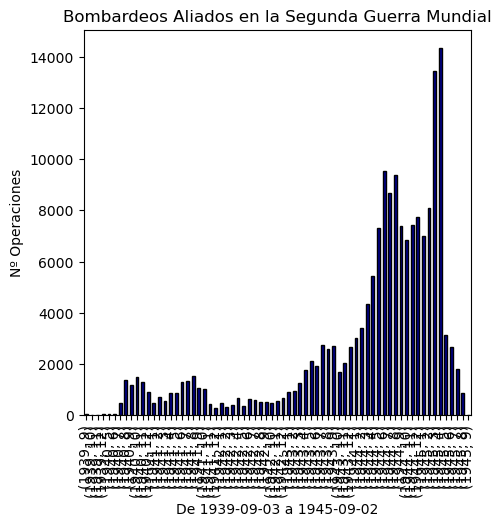

In [50]:
fun_crono(df_total)

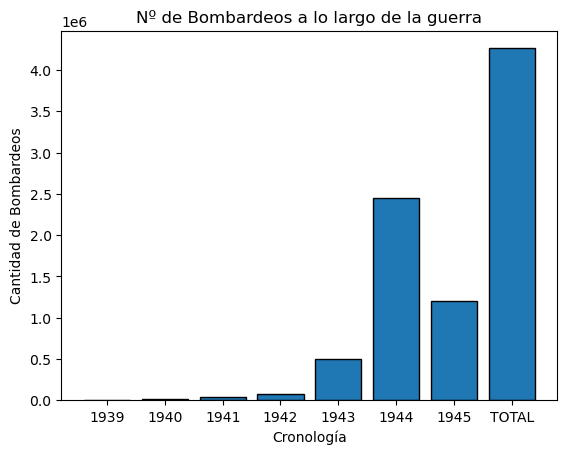

In [51]:
aa=int(sum(df_total_39["TOTAL_TONS"]))
bb=int(sum(df_total_40["TOTAL_TONS"]))
cc=int(sum(df_total_41["TOTAL_TONS"]))
dd=int(sum(df_total_42["TOTAL_TONS"]))
ee=int(sum(df_total_43["TOTAL_TONS"]))
ff=int(sum(df_total_44["TOTAL_TONS"]))
gg=int(sum(df_total_45["TOTAL_TONS"]))
hh=int(sum(df_total["TOTAL_TONS"]))

toneladas=[aa, bb, cc, dd, ee, ff, gg, hh]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]


plt.bar(años, toneladas, edgecolor='black')

plt.ylabel('Cantidad de Bombardeos')
plt.xlabel('Cronología')
plt.title("Nº de Bombardeos a lo largo de la guerra")
 
plt.show()

### +Operaciones aeromilitares a lo largo de cada Año

#### · Operaciones en 1939

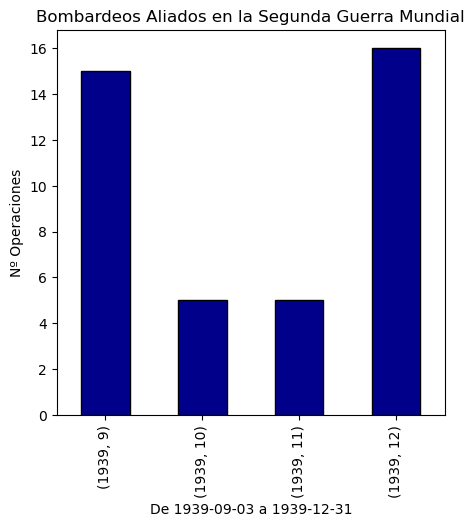

In [52]:
df_crono_39=fun_crono(df_total_39)

#### · Operaciones en 1940

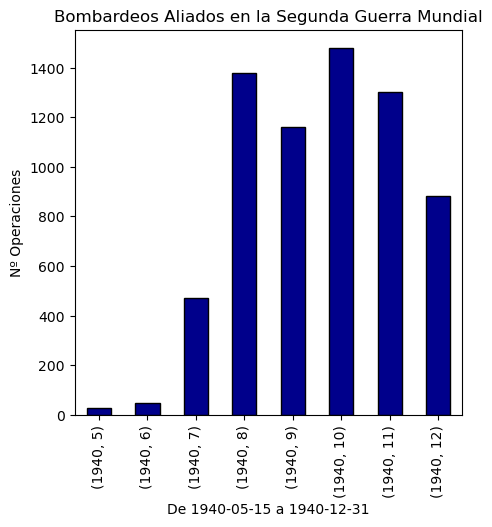

In [53]:
df_crono_40=fun_crono(df_total_40)

#### · Operaciones en 1941

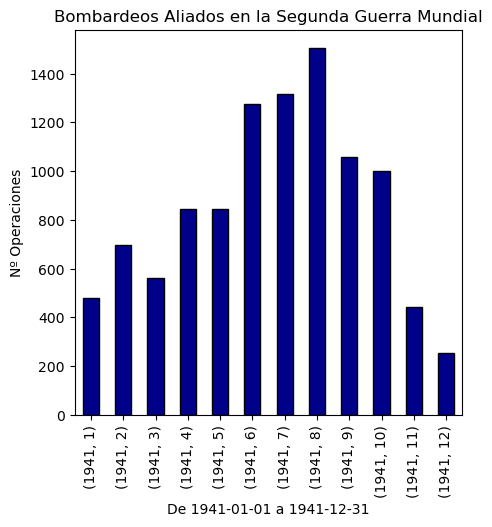

In [54]:
df_crono_41=fun_crono(df_total_41)

#### · Operaciones en 1942

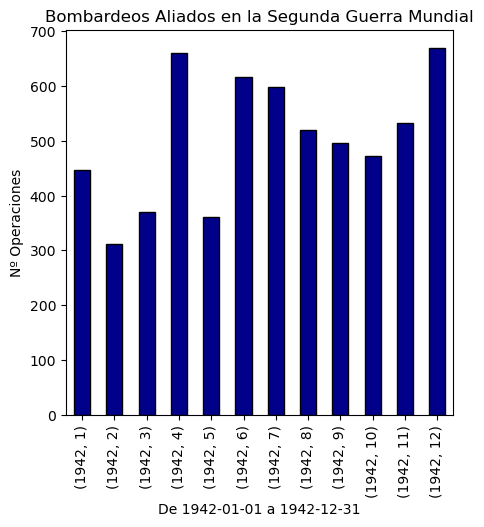

In [55]:
df_crono_42=fun_crono(df_total_42)

#### · Operaciones en 1943

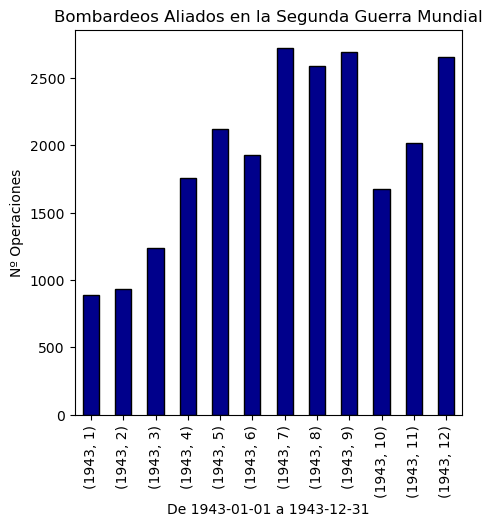

In [56]:
df_crono_43=fun_crono(df_total_43)

#### · Operaciones en 1944

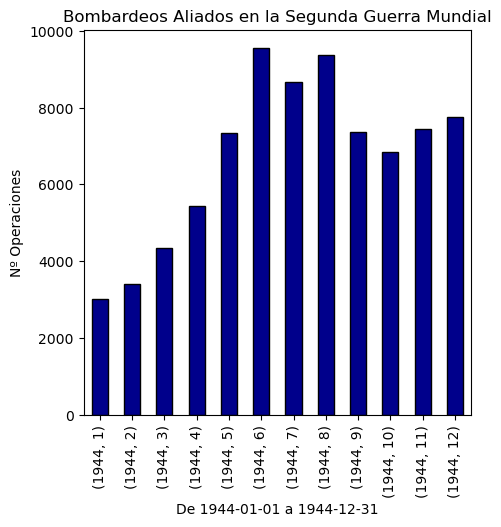

In [57]:
df_crono_44=fun_crono(df_total_44)

#### · Operaciones en 1945

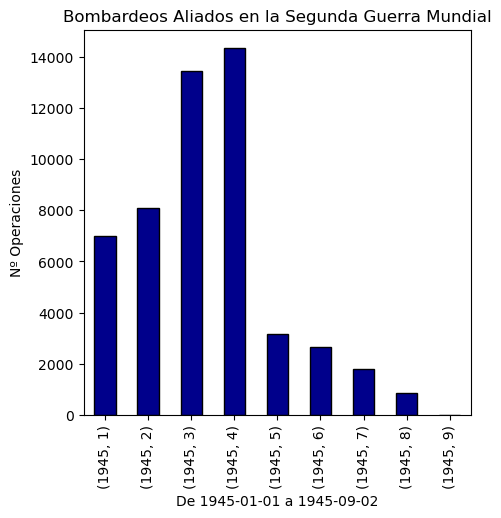

In [58]:
df_crono_45=fun_crono(df_total_45)

## >Fechas Destacadas
[volver al menú](#Menú)

### +Fechas Destacadas

#### · Batalla de Francia (del 10 de mayo al 25 de junio de 1940)

In [59]:
df_total_Francia=fun_total_fechas(df_total, "1940-05-15", "1940-06-25")
df_total_Francia=fun_total_inglaterra(df_total_Francia)

#### · Batalla de Inglaterra (del 10 de julio al 31 de octubre de 1940)

In [60]:
df_total_Inglaterra=fun_total_fechas(df_total, "1940-07-10", "1940-10-31")
df_total_Inglaterra=fun_total_inglaterra(df_total_Inglaterra)

#### · Bombardeo de Colonia (del 30 al 31 de Mayo de 1942)

In [61]:
df_total_Colonia=fun_total_fechas(df_total, "1942-05-30", "1942-05-31")
df_total_Colonia=df_total_Colonia[df_total_Colonia["TGT_LOCATION"]=="COLOGNE"]

#### · Bombardeos de Hamburgo (del 24 de julio al 3 de agosto de 1943)

In [62]:
df_total_Hamburgo=fun_total_fechas(df_total, "1943-07-24", "1943-08-03")
df_total_Hamburgo=df_total_Hamburgo[df_total_Hamburgo["TGT_LOCATION"]=="HAMBURG"]

#### · Incidente de Charlie Brown y Franz Stigler (el 20 de diciembre de 1943)

In [63]:
df_total_Charlie=fun_total_fechas(df_total, "1943-12-20")
df_total_Charlie=df_total_Charlie[df_total_Charlie["TGT_LOCATION"]=="BREMEN"]

#### · Bombardeos de Wuhan (del 18 al 21 de diciembre de 1944)

In [64]:
df_total_Wuhan=fun_total_fechas(df_total, "1944-12-18", "1944-12-21")

#Por algún motivo, la localización de Wuhan no está referida como "WUHAN", sino como "HANKOW", "HANKON", "HAINAN ISLAND", "WUCHUANG" y "WUCHANG". Esto se puede comprobar por las coordenadas.
A=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKOW"]
B=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKON"]
C=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HAINAN ISLAND"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHUANG"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHANG"]
df_total_Wuhan = A.append([B,C,D])

df_total_Wuhan=df_total_Wuhan.sort_values(by='MSNDATE')

#### · Bombardeos de Dresde (del 13 al 15 de febrero de 1945)

In [65]:
df_total_Dresden=fun_total_fechas(df_total, "1945-02-13", "1945-02-15")
df_total_Dresden=df_total_Dresden[df_total_Dresden["TGT_LOCATION"]=="DRESDEN"]

#### · Bombardeos de Tokio (el 9 de marzo de 1945)

In [66]:
df_total_Tokyo=fun_total_fechas(df_total, "1945-03-09")
df_total_Tokyo=df_total_Tokyo[df_total_Tokyo["TGT_LOCATION"]=="TOKYO"]

#### · Bombardeos de Hiroshima y Nagasaki (del 6 y el 9 de agosto de 1945)

In [67]:
df_total_Hiroshima=fun_total_fechas(df_total, "1945-08-06")
df_total_Hiroshima=df_total_Hiroshima[df_total_Hiroshima["TGT_LOCATION"]=="HIROSHIMA"]

df_total_Nagasaki=fun_total_fechas(df_total, "1945-08-09")
df_total_Nagasaki=df_total_Nagasaki[df_total_Nagasaki["TGT_LOCATION"]=="NAGASAKI"]

## >Teatro de Operaciones más frecuente
[volver al menú](#Menú)

### +Teatro de Operaciones más frecuentes, en Total

<AxesSubplot:xlabel='THEATER', ylabel='count'>

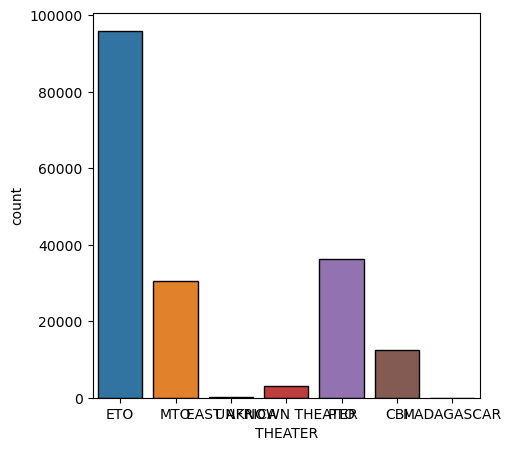

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(df_total["THEATER"], edgecolor='black')

### +Teatro de Operaciones más frecuente, según País Atacante, en Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

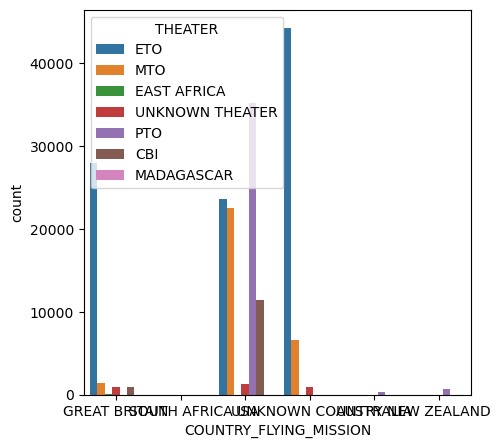

In [69]:
plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=(df_total))

### +Teatro de Operaciones más frecuente, según País Atacante, en 1945

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

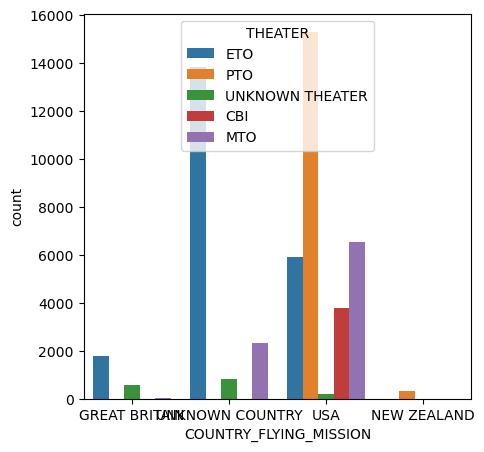

In [70]:
plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_45)

### +Teatro de Operaciones más frecente, según País Atacante, en Total, con ataques superiores a 100 y 800 de Daño Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

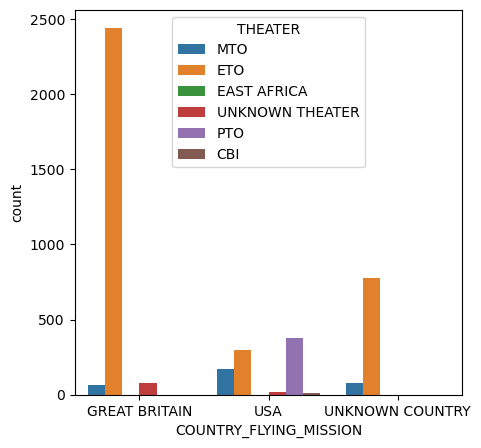

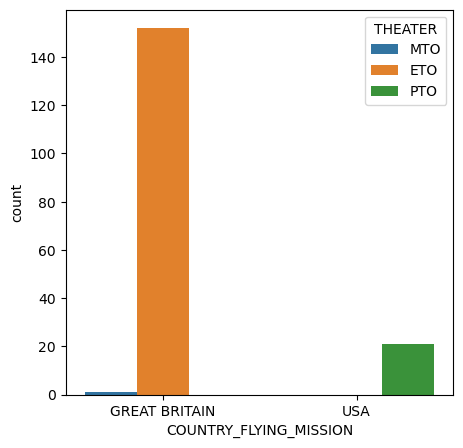

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>100])

plt.figure(figsize=(5,5), edgecolor='black')
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>800])

## >Modelos de Avión más frecuentes
[volver al menú](#Menú)

### +Modelos de Avión más frecuentes, en Total, particularizando los 10 más frecuentes

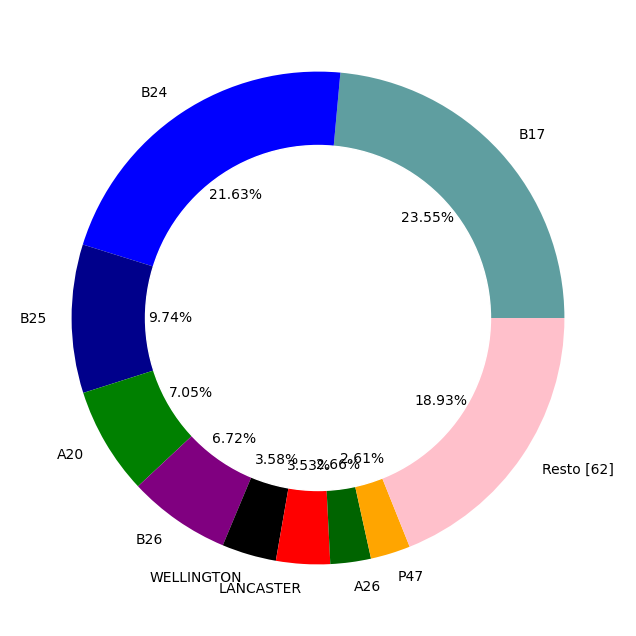

In [72]:
fun_modelos_avion(df_total, top=9, circulo=True)

### +Modelos de Avión más utilizados por Inglaterra en la Batalla de Inglaterra

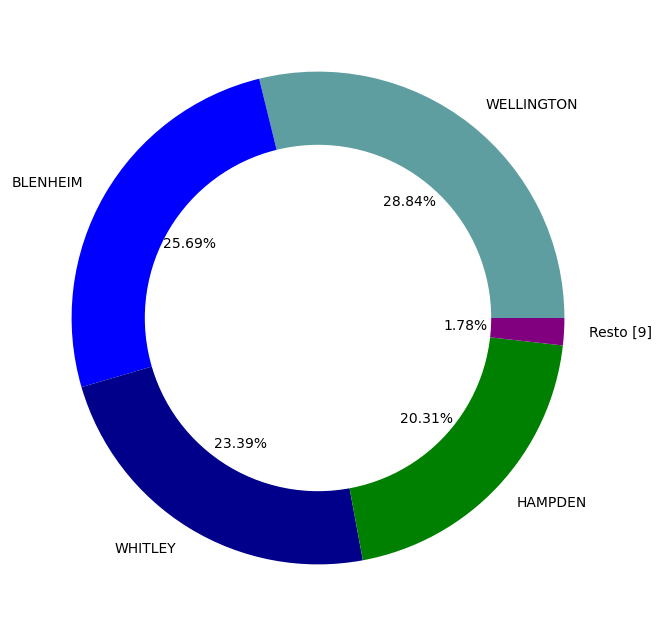

In [73]:
fun_modelos_avion(df_total_Inglaterra, top=4, circulo=True)

### +Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 400

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

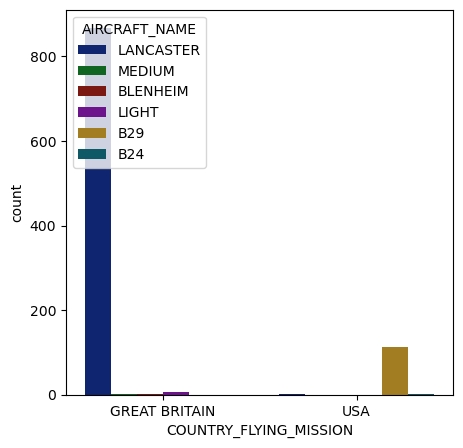

In [74]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>400]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

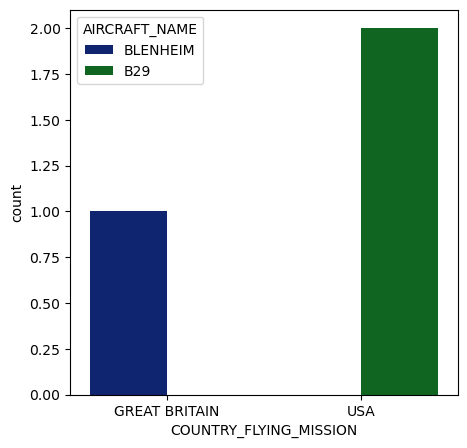

In [75]:
df_total_Tons_1000=df_total[df_total["TOTAL_TONS"]>1000]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_1000)

### +Detonaciones superiores a 990 Tonelada de Drestrucción Total

176


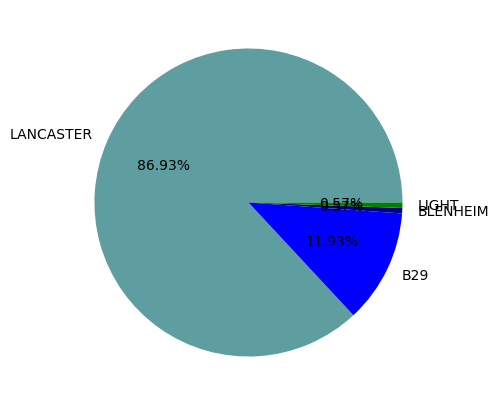

In [76]:
df_total_Tons_990=df_total[df_total["TOTAL_TONS"]>=800]
print (len(df_total_Tons_990))
fun_modelos_avion(df_total_Tons_990, x=5, y=5)

## >Destrucción Total
[volver al menú](#Menú)

### +Destrucción Total a lo largo de toda la Guerra

<AxesSubplot:xlabel='MSNDATE'>

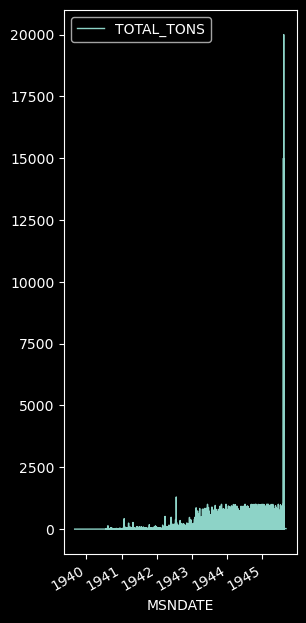

In [77]:
plt.style.use('dark_background')
c=df_total#[df_total["TOTAL_TONS"]<1000]  #<---Si queremos eliminar las operaciones ultradestructivas
c.plot.line(y='TOTAL_TONS',figsize=(3,8),lw=1)

### +Distribución de la Destrucción Total, en Total

<AxesSubplot:ylabel='Density'>

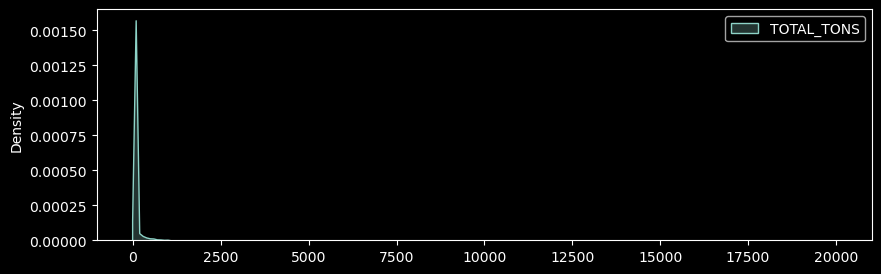

In [78]:
s=df_total.drop(['TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)
plt.style.use("dark_background")
plt.figure(figsize=(10,3))
sns.kdeplot(data=s[s.columns.values], shade=True)

### +Destrucción Total, en Total, según Países Atacados

<Figure size 100x100 with 0 Axes>

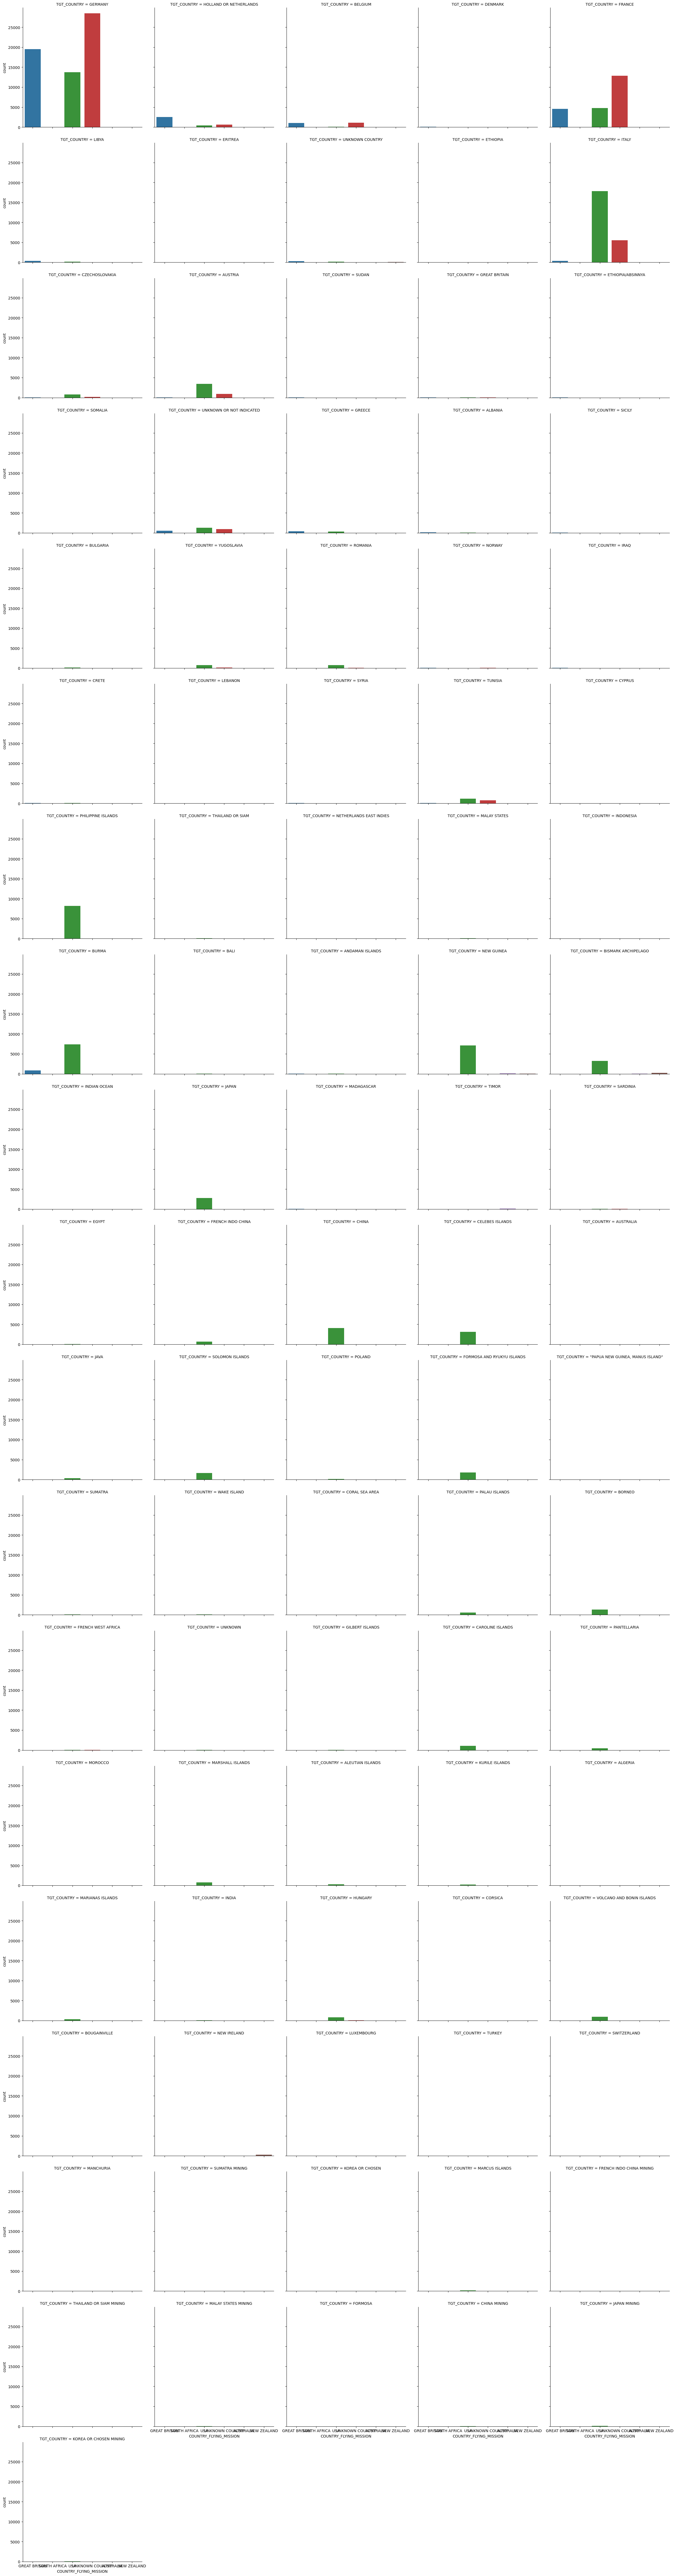

In [79]:
plt.style.use("default")
plt.figure(figsize=(1,1))
sns.catplot(x = "COUNTRY_FLYING_MISSION",
col = "TGT_COUNTRY",
col_wrap = 5,
data = df_total,
label= x,
kind = "count");

### +Media de la Destrucción Total (los 10 mayores), en Total, según los Modelos de Avión

#### · Según Modelos de Avión con mayor media

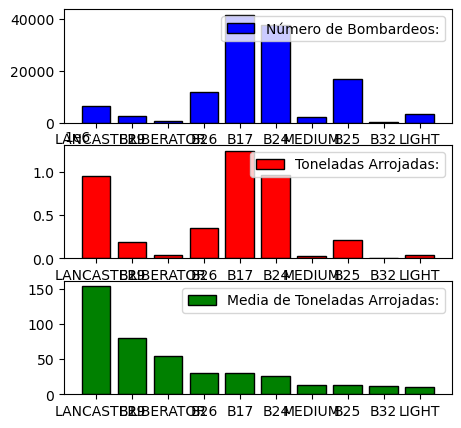

In [80]:
fun_uso_aviones (df_total, top=10, media=True, tons=1)

#### · Según Modelos de Avión más frecuentes

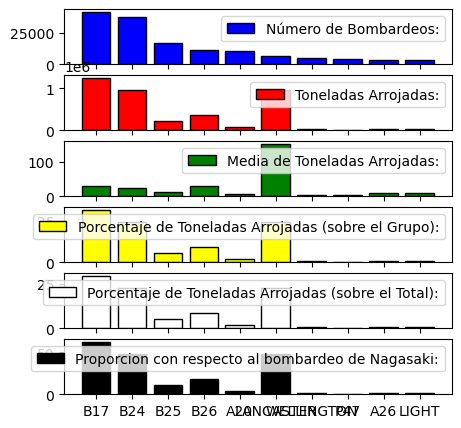

In [81]:
fun_uso_aviones (df_total, top=10, extra=True, tons=1)

### +Relación entre las Toneladas Arrojadas, y el número de unidades dentro de cada operación

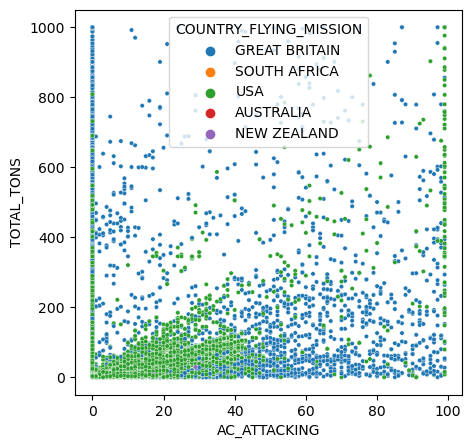

In [82]:
fun_ac_tons (df_total, ac=100, tons=1000, desconocidos=False)

# OTROS
[volver al menú](#Menú)

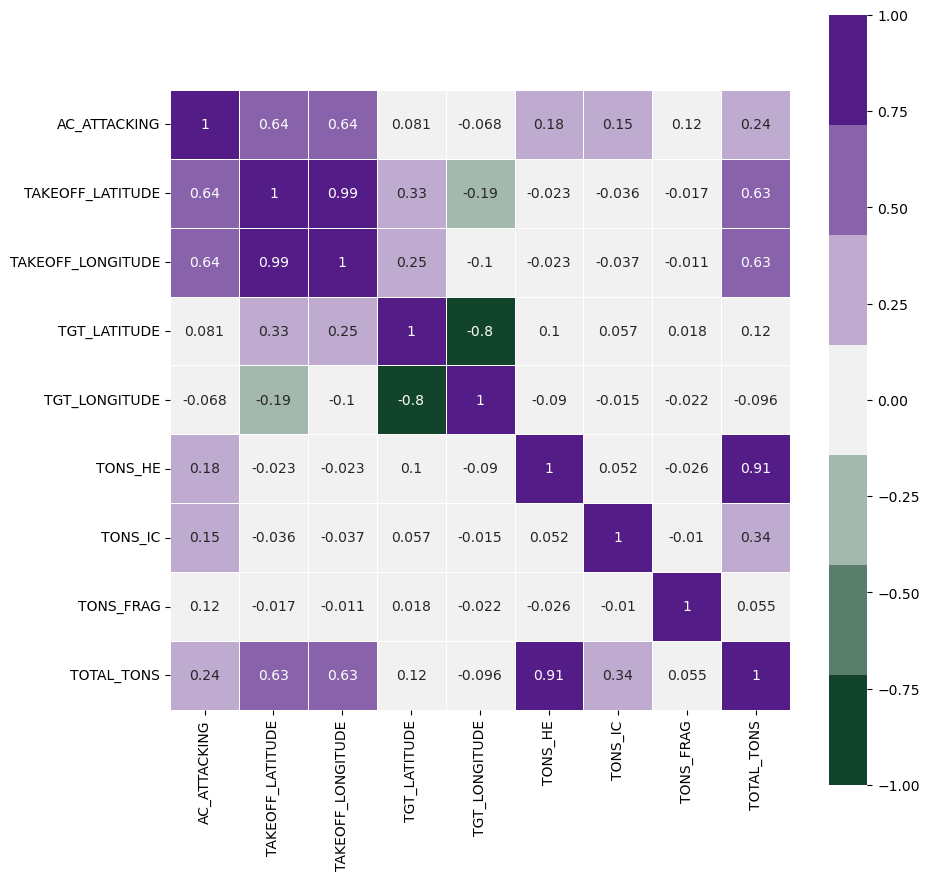

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df_total.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

<AxesSubplot:xlabel='TGT_COUNTRY,COUNTRY_FLYING_MISSION'>

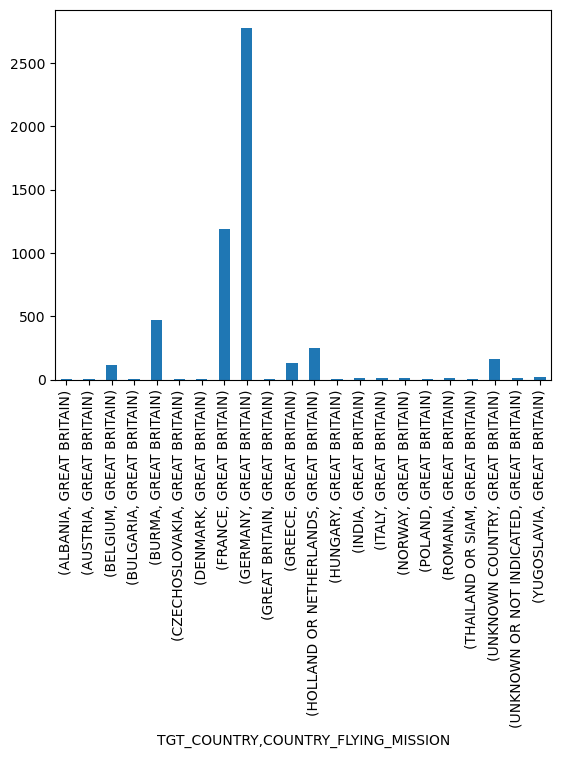

In [84]:
#Número de combinaciones entre Reino Unido y los Países Atacados
xxx=df_total_44[df_total_44["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]

groups = xxx.groupby(['TGT_COUNTRY','COUNTRY_FLYING_MISSION']).size()
groups.plot.bar()

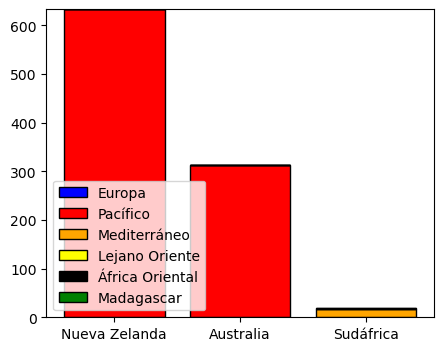

In [85]:
fun_uso_paises_aliados (df_total)

In [86]:
#Estos son los diferentes colores disponibles:
("black","gray", "cadetblue","darkblue","darkpurple",
 "blue","purple", "orange", "red","darkred","darkgreen",
 "green","lightgray", "pink","lightred","beige","lightblue","lightgreen","white")

('black',
 'gray',
 'cadetblue',
 'darkblue',
 'darkpurple',
 'blue',
 'purple',
 'orange',
 'red',
 'darkred',
 'darkgreen',
 'green',
 'lightgray',
 'pink',
 'lightred',
 'beige',
 'lightblue',
 'lightgreen',
 'white')

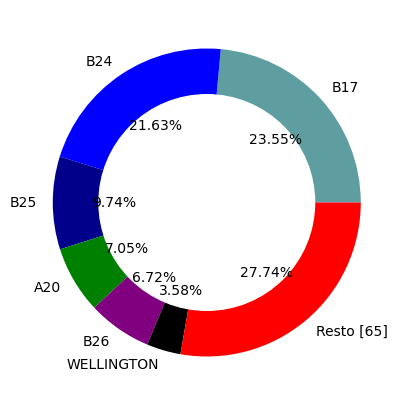

In [87]:
fun_modelos_avion(df_total, style=11, circulo=True, top=6, x=5, y=5)

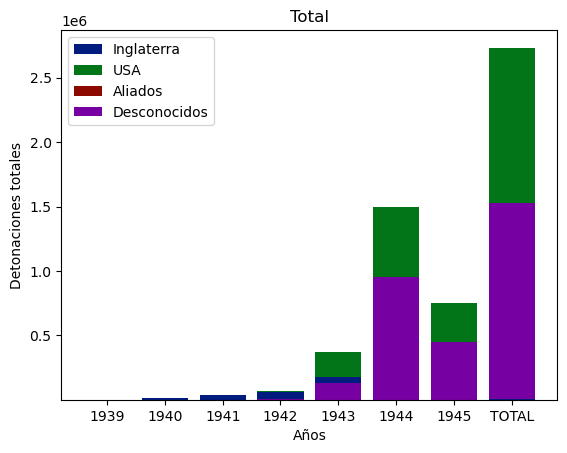

In [88]:
#Ideal para la acción de cada país en cada año

lista_suprema=[df_total_39, df_total_40, df_total_41, df_total_42, df_total_43, df_total_44, df_total_45, df_total]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]
inglaterra=[]
usa=[]
aliados=[]
desconocidos=[]

for i in lista_suprema:
    a=int(sum((fun_total_inglaterra(i))["TOTAL_TONS"]))
    b=int(sum((fun_total_usa(i))["TOTAL_TONS"]))
    c=int(sum((fun_total_aliados(i))["TOTAL_TONS"]))
    d=int(sum((fun_total_desconocidos(i))["TOTAL_TONS"]))
    inglaterra.append(a)
    usa.append(b)
    aliados.append(c)
    desconocidos.append(d)

indice = np.arange(len(años))
 
plt.bar(indice, inglaterra, label='Inglaterra')
plt.bar(indice, usa, label='USA',  bottom=inglaterra)
plt.bar(indice, aliados, label='Aliados',  bottom=usa)
plt.bar(indice, desconocidos, label='Desconocidos',  bottom=aliados)
 
plt.xticks(indice, años)
plt.ylabel("Detonaciones totales")
plt.xlabel("Años")
plt.title('Total')
plt.legend()
 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

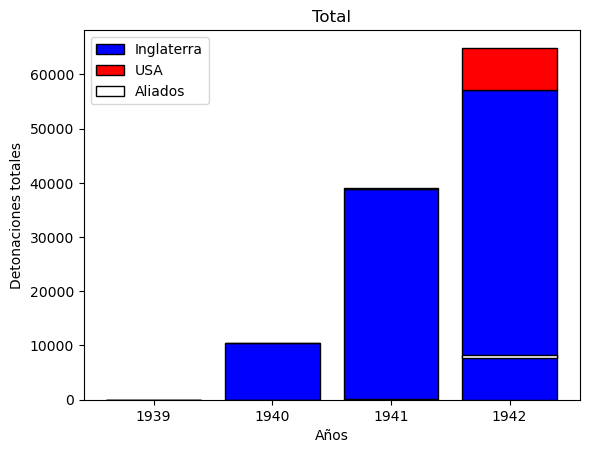

In [89]:
#Ideal para la acción de cada país en cada año

lista_suprema=[df_total_39, df_total_40, df_total_41, df_total_42]
años=["1939", "1940", "1941", "1942"]
inglaterra=[]
usa=[]
aliados=[]
desconocidos=[]

for i in lista_suprema:
    a=int(sum((fun_total_inglaterra(i))["TOTAL_TONS"]))
    b=int(sum((fun_total_usa(i))["TOTAL_TONS"]))
    c=int(sum((fun_total_aliados(i))["TOTAL_TONS"]))
    inglaterra.append(a)
    usa.append(b)
    aliados.append(c)

indice = np.arange(len(años))
 

plt.bar(indice, inglaterra, label='Inglaterra',  color="blue", edgecolor='black')
plt.bar(indice, usa, label='USA',  bottom=inglaterra,  color="red", edgecolor='black')
plt.bar(indice, aliados, label='Aliados',  bottom=usa,  color="white", edgecolor='black')

 
plt.xticks(indice, años)
plt.ylabel("Detonaciones totales")
plt.xlabel("Años")
plt.title('Total')
plt.legend()
 
plt.show#savefig("Total de Toneladas Arrojadas entre 1939 y finales de 1942")#show()

In [90]:
def funcion_rara (df_total_year):
    uno=fun_total_fechas(df_total_year, "1939")
    dos=fun_total_fechas(df_total_year, "1940")
    tres=fun_total_fechas(df_total_year, "1941")
    cuatro=fun_total_fechas(df_total_year, "1942")
    cinco=fun_total_fechas(df_total_year, "1943")
    seis=fun_total_fechas(df_total_year, "1944")
    siete=fun_total_fechas(df_total_year, "1945")
    lista=[uno[0], dos[0], tres[0], cuatro[0], cinco[0], seis[0], siete[0]]
    
    return lista

In [91]:
ee=fun_total_fechas(df_total_39, "1945")
ee.index

DatetimeIndex([], dtype='datetime64[ns]', name='MSNDATE', freq=None)

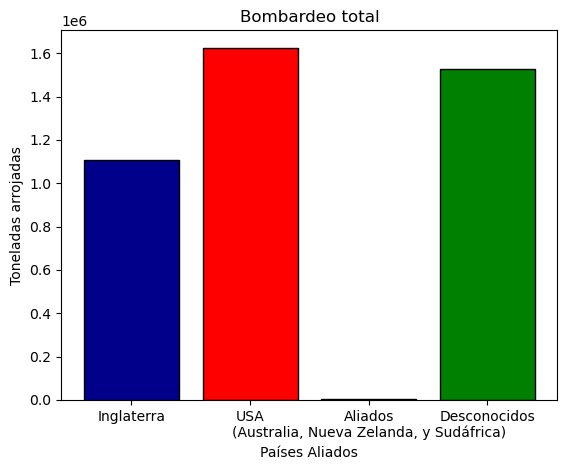

In [92]:
fun_suma_tons (df_total, desconocidos=True)

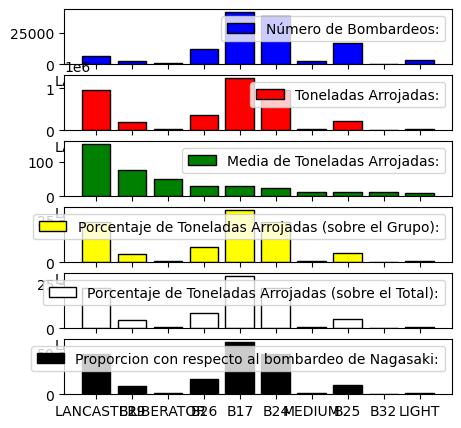

In [93]:
fun_uso_aviones (df_total, top=10, media=True, extra=True)

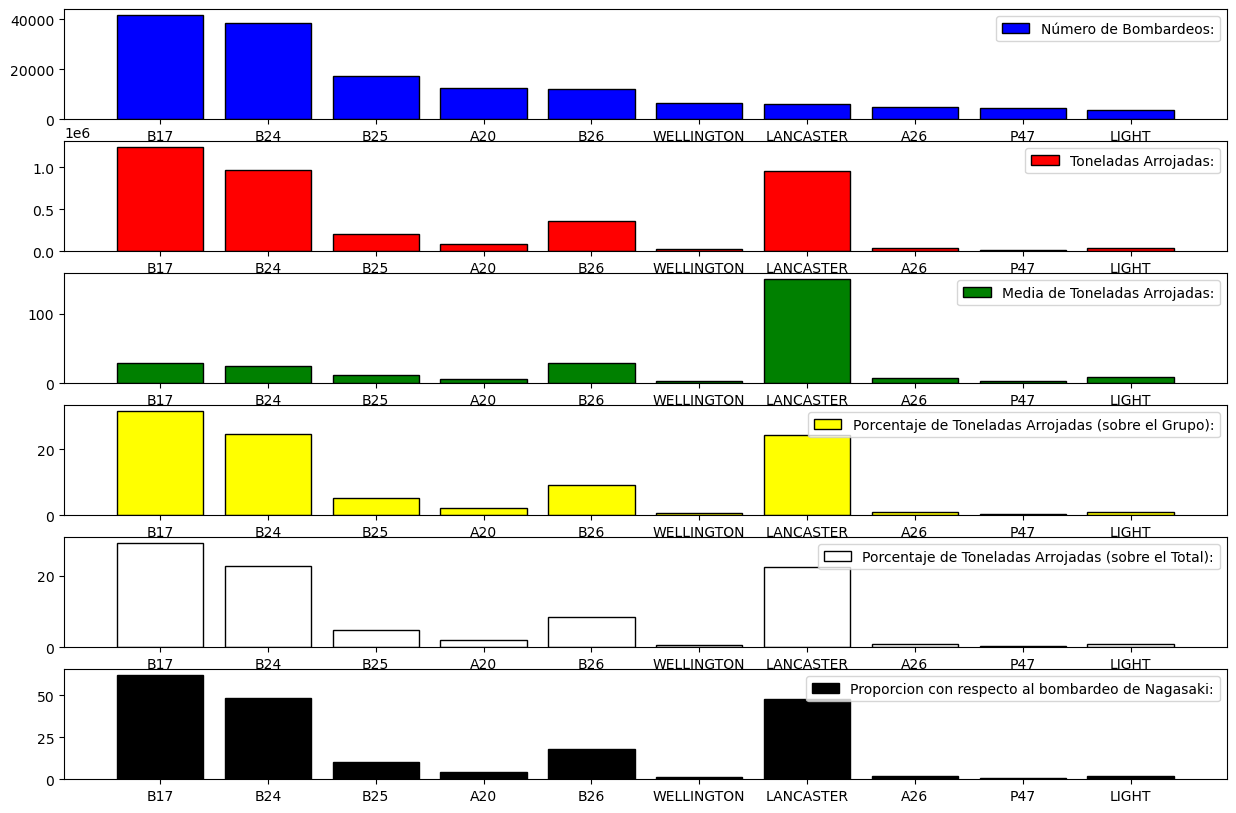

In [94]:
fun_uso_aviones (df_total, top=15, x=15, y=10, extra=True)

Nombre del Modelo: B17
·Pais más común: USA
·Teatro más común: ETO 
·Número de Bombardeos: 41973
·Toneladas Arrojadas: 1248099.66 
·Media de Toneladas Arrojadas: 29.736 

Nombre del Modelo: LANCASTER
·Pais más común: GREAT BRITAIN
·Teatro más común: ETO 
·Número de Bombardeos: 6298
·Toneladas Arrojadas: 953399.0 
·Media de Toneladas Arrojadas: 151.381 

Nombre del Modelo: LIBERATOR
·Pais más común: GREAT BRITAIN
·Teatro más común: MTO 
·Número de Bombardeos: 769
·Toneladas Arrojadas: 37885.82 
·Media de Toneladas Arrojadas: 49.266 

Nombre del Modelo: WHITLEY
·Pais más común: GREAT BRITAIN
·Teatro más común: ETO 
·Número de Bombardeos: 3205
·Toneladas Arrojadas: 8830.0 
·Media de Toneladas Arrojadas: 2.755 



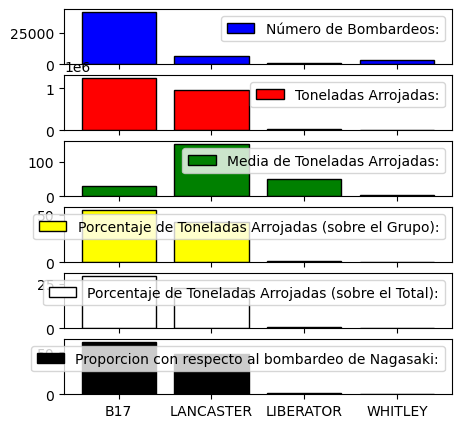

In [95]:
fun_uso_avion (df_total, "B17", "LaNCASTER", "LIBERATOR", "WHITLEY", info=True, extra=True)

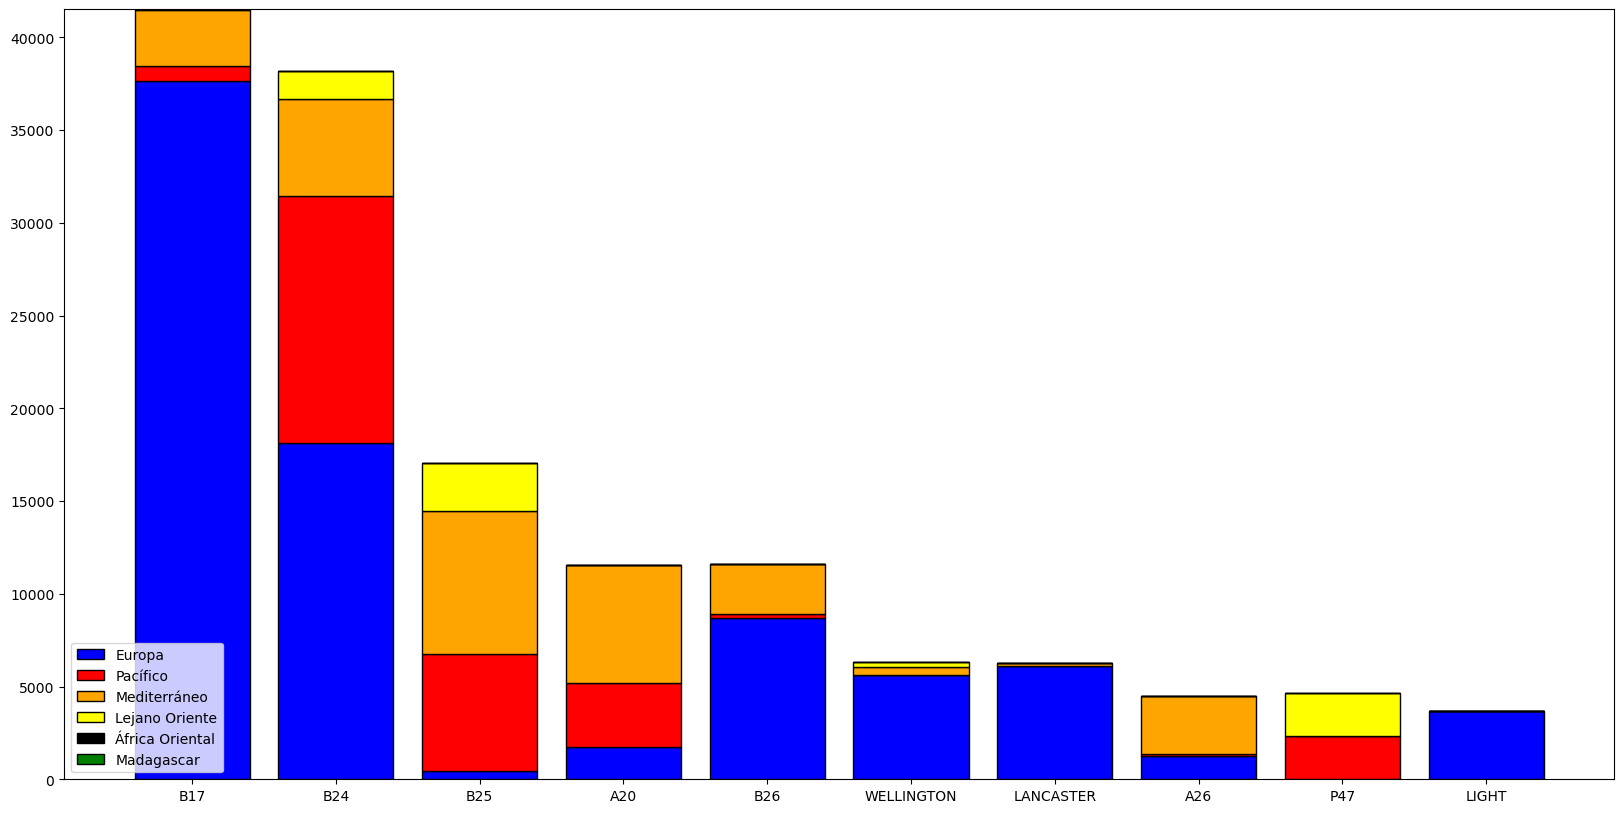

In [96]:
fun_uso_avion_teatro (df_total, 'B17', 'B24', 'B25', 'A20', 'B26', 'WELLINGTON', 'LANCASTER', 'A26', 'P47', 'LIGHT', x=20, y=10)

<AxesSubplot:title={'center':'Bombardeos Aliados en la Segunda Guerra Mundial'}, xlabel='De 1943-01-01 a 1945-09-02', ylabel='Nº Operaciones'>

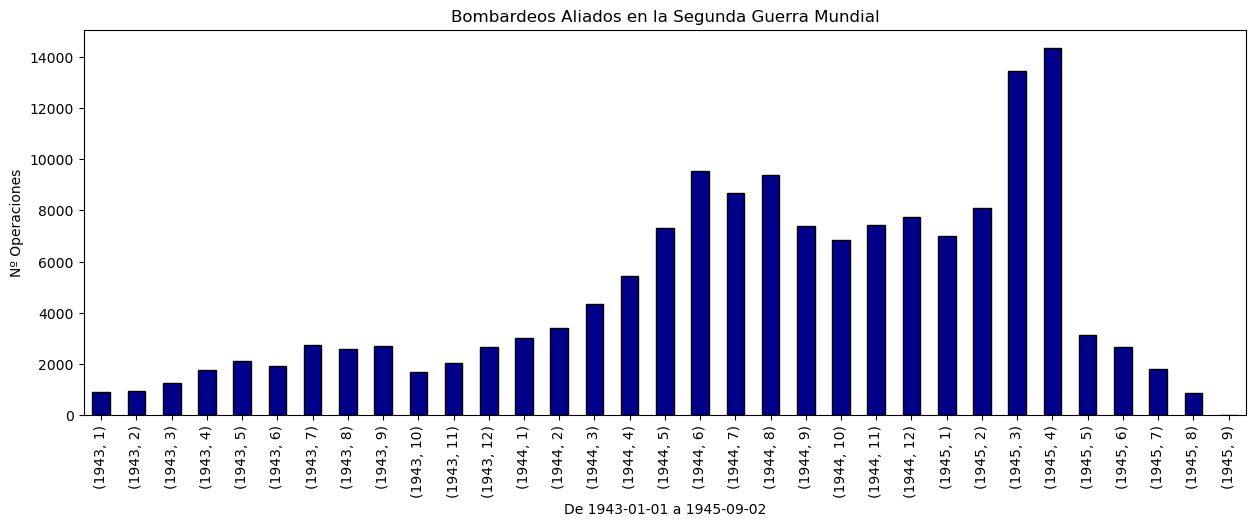

In [97]:
fun_crono (fun_total_fechas(df_total, "1943", "1945"), x=15)

In [98]:
fun_gps2(fun_total_fechas(fun_total_mediterraneo(df_total), "1942"),  x=25, y=32, z=7, multiplicador=20, tons=0)

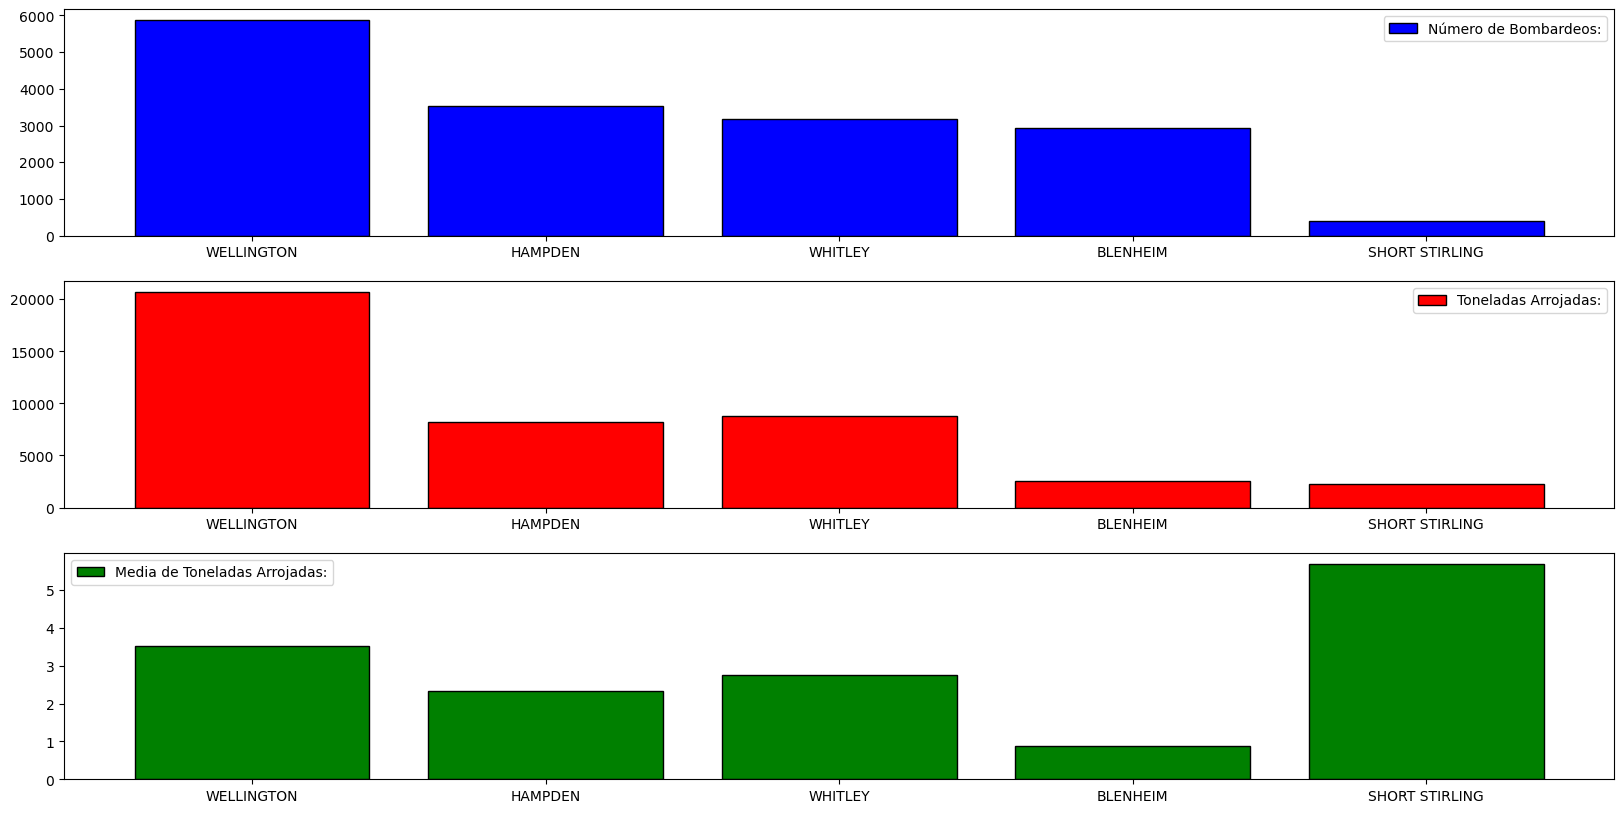

In [99]:
fun_uso_aviones (fun_total_inglaterra(fun_total_fechas(df_total, "1939", "1941-12-31")), top=5, extra=False, x=20, y=10)

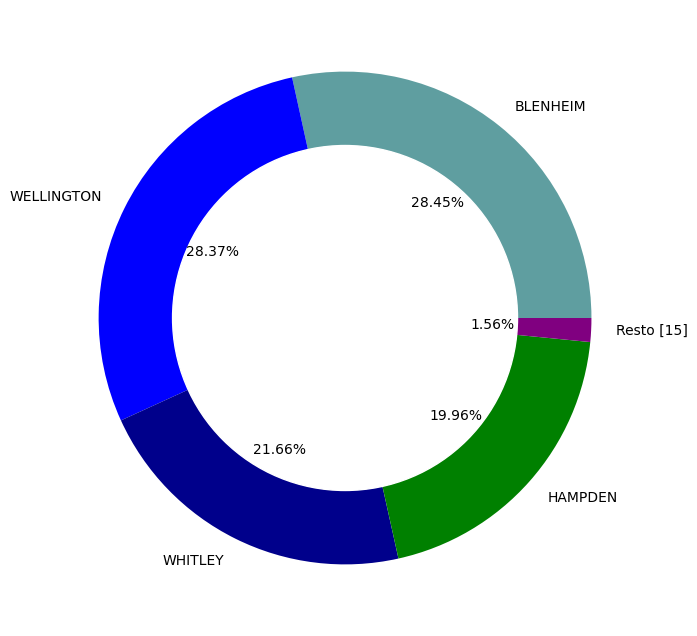

In [100]:
fun_modelos_avion (df_total_40, top=4, circulo=True)

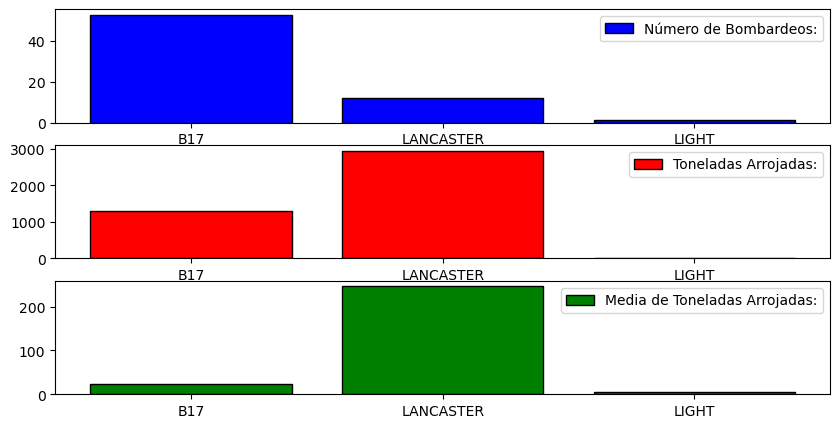

In [101]:
fun_uso_aviones(df_total_Dresden, extra=False, x=10, y=5)

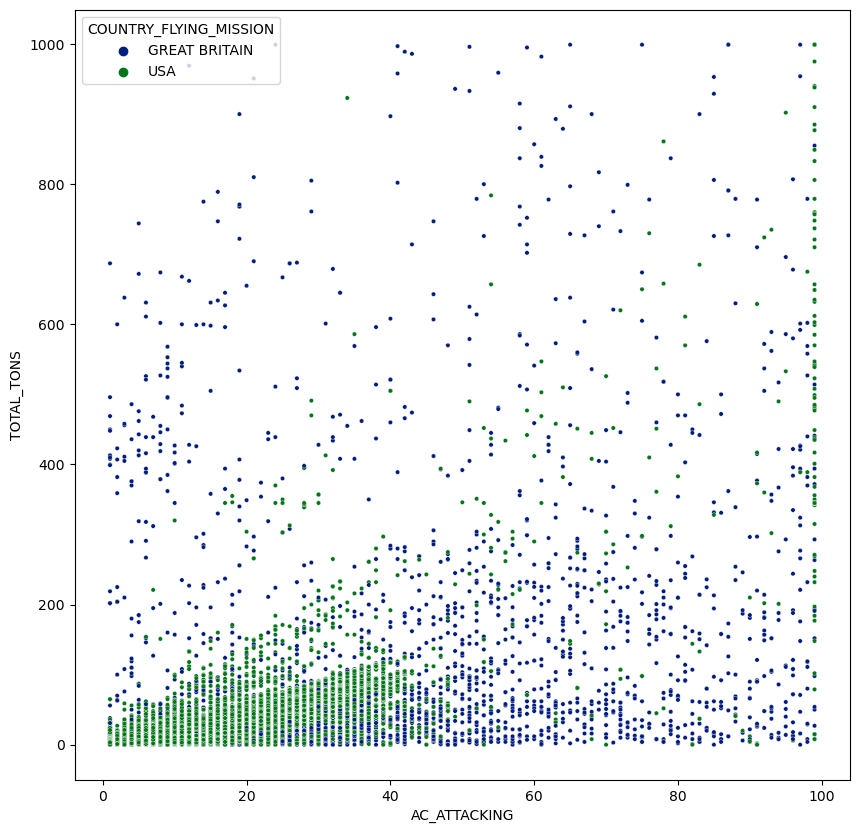

In [102]:
fun_ac_tons (fun_total_aliados_top(df_total), x=10, y=10, ac=100, ac_1=True, tons=1000)

In [103]:
fun_knn (fun_total_pacifico(df_total), ac=1, tons=20000, desconocidos=True, n=2)

CARACTERÍSTICAS DEFINIDAS: 
·Número de Aviones en la Operación: 1
·Número de Toneladas Arrojadas: 20000
·Número de NKK aplicado: 2
·Incluye desconocidos: True

PREDICCIÓN: 
·País atacante: USA, al 100.0% 
·Modelo: B29, al 100.0% 
·País atacado: JAPAN, al 100.0% 
·Localidad atacada: HIROSHIMA, al 50.0%


In [104]:
fun_knn (fun_total_europa(df_total), ac=100, tons=1000, desconocidos=True, n=50)

CARACTERÍSTICAS DEFINIDAS: 
·Número de Aviones en la Operación: 100
·Número de Toneladas Arrojadas: 1000
·Número de NKK aplicado: 50
·Incluye desconocidos: True

PREDICCIÓN: 
·País atacante: GREAT BRITAIN, al 100.0% 
·Modelo: LANCASTER, al 100.0% 
·País atacado: GERMANY, al 80.0% 
·Localidad atacada: ESSEN, al 12.0%


In [105]:
df_total.groupby("COUNTRY_FLYING_MISSION").count()

THEATER    NAF  UNIT_ID  AIRCRAFT_NAME  AC_ATTACKING  \
COUNTRY_FLYING_MISSION                                                         
AUSTRALIA                   316    316      316            316           316   
GREAT BRITAIN             31361  31361    31361          31361         31361   
NEW ZEALAND                 633    633      633            633           633   
SOUTH AFRICA                 19     19       19             19            19   
UNKNOWN COUNTRY           51787  51787    51787          51787         51787   
USA                       94111  94111    94111          94111         94111   

                        TAKEOFF_BASE  TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  \
COUNTRY_FLYING_MISSION                                                    
AUSTRALIA                        260              260                 0   
GREAT BRITAIN                   1073             1037               963   
NEW ZEALAND                      107              102               102   
SOUTH AFRICA                      15               15                15   
UNKNOWN COUNTRY                    0                0                 0   
USA                             1924             1924              1900   

                        TAKEOFF_LONGITUDE  TGT_COUNTRY  TGT_LOCATION  \
COUNTRY_FLYING_MISSION                                                 
AUSTRALIA                               0          316           316   
GREAT BRITAIN                         963        31361         31361   
NEW ZEALAND                           102          633           633   
SOUTH AFRICA                           15           19            19   
UNKNOWN COUNTRY                         0        51787         51787   
USA                                  1900        94111         94111   

                        TGT_LATITUDE  TGT_LONGITUDE  TONS_HE  TONS_IC  \
COUNTRY_FLYING_MISSION                                                  
AUSTRALIA                        316            316      316      316   
GREAT BRITAIN                  29514          29511    31361    31361   
NEW ZEALAND                      633            633      633      633   
SOUTH AFRICA                      18             18       19       19   
UNKNOWN COUNTRY                49022          49022    51787    51787   
USA                            90034          90015    94111    94111   

                        TONS_FRAG  TOTAL_TONS  
COUNTRY_FLYING_MISSION                         
AUSTRALIA                     316         316  
GREAT BRITAIN               31361       31361  
NEW ZEALAND                   633         633  
SOUTH AFRICA                   19          19  
UNKNOWN COUNTRY             51787       51787  
USA                         94111       94111

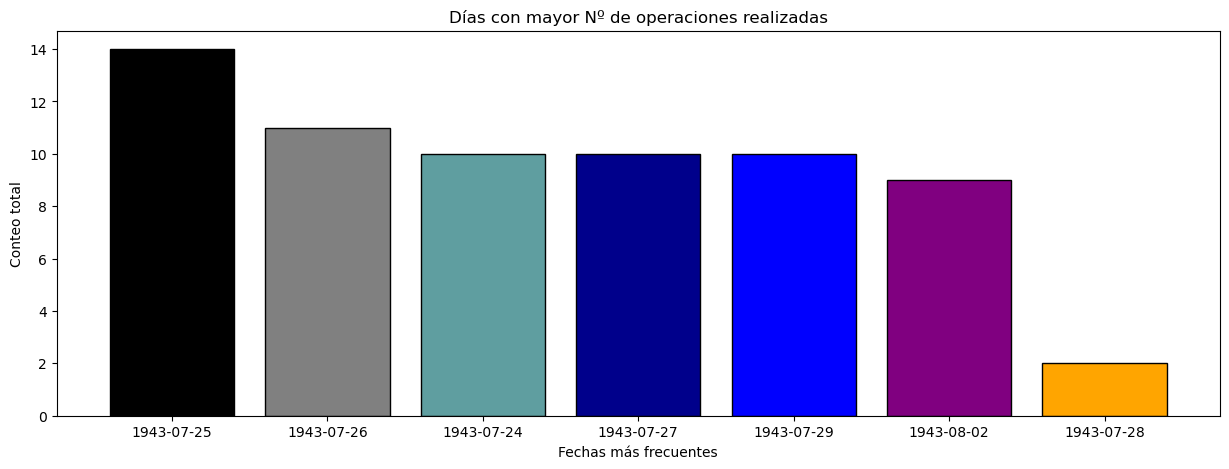

In [106]:
fun_top_days (df_total_Hamburgo, toneladas=False, modo=1)

In [107]:
help (fun_top_days)

Help on function fun_top_days in module __main__:

fun_top_days(df_total_year, modo=1, x=15, y=5, tons=0, top=7, low=None, toneladas=False, ascendente=False, save='0')
    Función para graficar los días con mayor Nº de Operaciones realizadas y/o Nº de Toneladas arrojadas, dentro de un dataframe:
    :param modo:        comando que puede ser 1 (nª operaciones totales), 2 (toneladas totales) o 3 (ambos).
    :param x:           ancho de la gráfica.
    :param y:           alto de la gráfica.
    :param tons :       mínimo de toneladas totales de una misión para ser tomada en cuenta (entre 0 al 20.000 toneladas totales). Por defecto, 0.
    :param top:         número de días con mayor índice de operaciones para mostrar en la gráfica. Por defecto, 7.
    :param toneladas:   poner como "True" para ordenar según los días com mayor nº de toneladas totales.
    :param ascendente:  poner como "True", para de menor a mayor.
    :param low:·········SI EL USUERIO LO DESEA, puede indicar un valor n

<AxesSubplot:title={'center':'Bombardeos Aliados en la Segunda Guerra Mundial'}, xlabel='De 1943-07-24 a 1943-08-02', ylabel='Nº Operaciones'>

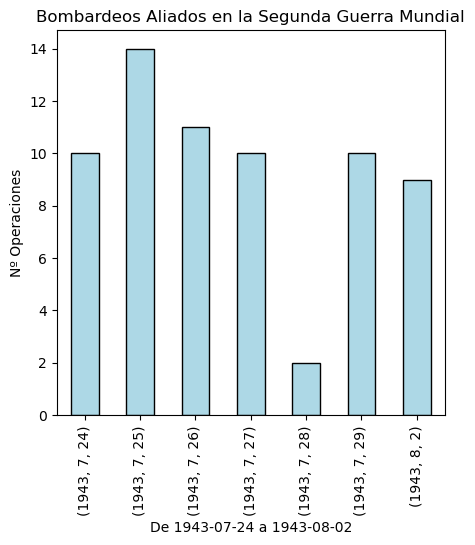

In [174]:
fun_crono(df_total_Hamburgo, days=True)

In [ ]:
tt=df_total.groupby("AIRCRAFT_NAME").sum()
tt=tt["TOTAL_TONS"].sort_values(ascending=False)
tt.index

In [ ]:
tt

In [ ]:
def fun_suma_tons_MAX2 (df_total_year, x=15, y=5, save="0"):
    a=fun_total_paises (df_total_year, "GERMANY")
    b=fun_total_paises (df_total_year, "JAPAN")
    c=fun_total_paises (df_total_year, "ITALY")
    e=fun_total_paises (df_total_year, "FRANCE")
    d=fun_total_paises (df_total_year, "BURMA")
    f=fun_total_paises (df_total_year, "AUSTRIA")
    g=fun_total_paises (df_total_year, "CHINA")
    h=fun_total_paises (df_total_year, "PHILIPPINE ISLANDS")
    i=fun_total_paises (df_total_year, "NEW GUINEA")
    j=fun_total_paises (df_total_year, "HOLLAND OR NETHERLANDS")

    
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"])), int(sum(d["TOTAL_TONS"])), int(sum(e["TOTAL_TONS"])), int(sum(f["TOTAL_TONS"])), int(sum(g["TOTAL_TONS"])), int(sum(h["TOTAL_TONS"])), int(sum(i["TOTAL_TONS"])), int(sum(j["TOTAL_TONS"]))]
    paises=["Alemania", "Japón", "Italia", "Francia", "Birmania", "Austria", "China", "Islas Filipinas", "Nueva Guinea", "Paises Bajos"]
    
    plt.figure(figsize=(x,y))
    
    plt.bar(paises, toneladas, color=("black","gray", "cadetblue","darkblue",
 "blue","purple", "orange", "red","darkred","darkgreen",
 "green","lightgray", "pink","beige","lightblue","lightgreen","white"), edgecolor='black')
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Atacados")
    plt.title ("Paises que más bombardeados")
    
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

In [ ]:
zz=df_total.groupby("TGT_COUNTRY").sum()
zzz=df_total.groupby("TGT_COUNTRY").count()
zz["NUMERO"]=zzz["TOTAL_TONS"]
zz=zz.iloc[:,-2:]
zz["TOTAL_TONS"].sort_values(ascending=False)
toneladas=True

lista_paises=[]
lista_operaciones=[]
lista_toneladas=[]


if toneladas == True:
    opcion="TOTAL_TONS"
    titulo="Días con mayor Nº de toneladas arrojadas"
else:
    opcion="NUMERO"
    titulo="Días con mayor Nº de operaciones realizadas"

dias=(zz[(opcion)].sort_values(ascending=False))[:7]


for i in dias.index:
    lista_paises.append(i)

for i in lista_paises:
    lista_operaciones.append((zz.loc[i])[1])
    lista_toneladas.append((zz.loc[i])[0])

plt.figure(figsize=(1,1))

plt.bar(lista_paises, lista_toneladas, color="red", edgecolor="black")

In [ ]:
def fun_top_countrys (df_total_year, low=None, top=7, x=15, y=5, tons=0, toneladas=False, ascendente=False, modo=1, save="0"):
    lista_paises=[]
    lista_operaciones=[]
    lista_toneladas=[]
    lista_colores=["black","gray","cadetblue","darkblue","blue","purple","orange","darkred","darkgreen","green","lightgray","pink","beige","lightblue","lightgreen","white"]
    lista_colores=lista_colores[low:]
    
    if tons > 0:
        df_total_year=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    
    qq=df_total_year.groupby("TGT_COUNTRY").sum()
    ss=df_total_year.groupby("TGT_COUNTRY").count()
    qq["NUMERO"]=ss["TOTAL_TONS"]
    qq=qq.iloc[:,-2:]
    
    if toneladas == True:
        opcion="TOTAL_TONS"
        titulo="Paises con mayor Nº de toneladas recibidas"
    else:
        opcion="NUMERO"
        titulo="Paises con mayor Nº de operaciones recibidas"
    
    dias=(qq[(opcion)].sort_values(ascending=ascendente))[low:top]

    for i in dias.index:
        lista_paises.append(i)
        
    for i in lista_paises:
        lista_operaciones.append((zz.loc[i])[1])
        lista_toneladas.append((zz.loc[i])[0])
    
    
    plt.figure(figsize=(x,y))
    
    if modo == 3:
        numero_de_grupos = len(lista_operaciones)
        indice_barras = np.arange(numero_de_grupos)
        ancho_barras =0.35
        plt.bar(indice_barras, lista_operaciones, width=ancho_barras, label='Nº de Operaciones', color=lista_colores, edgecolor="black")
        plt.bar(indice_barras + ancho_barras, lista_toneladas, width=ancho_barras, label='Toneladas Totales', color="red", edgecolor="black")
        plt.legend(loc='best')
        
        plt.xticks(indice_barras + ancho_barras, lista_paises)
    elif modo == 2:
        plt.bar(lista_paises, lista_toneladas, color="red", edgecolor="black")
    else:
        plt.bar(lista_paises, lista_operaciones, color=lista_colores, edgecolor="black")
    
    plt.ylabel('Conteo total')
    plt.xlabel('Paises atacados más frecuentes')
    plt.title(titulo)
    
    if save != "0":
        return plt.savefig(f'{save}')
    
    return plt.show()

In [ ]:
df_total_40.groupby("TGT_COUNTRY").sum()

In [ ]:
ii=(df_total.groupby("AC_ATTACKING").sum()).iloc[:,-4:]
iii=df_total.groupby("AC_ATTACKING").count()
ii["NUMERO"]=iii["TOTAL_TONS"]
ii

In [ ]:
rr=(df_total.groupby("AIRCRAFT_NAME").sum()).iloc[:,-4:]
rrr=(df_total.groupby("AIRCRAFT_NAME").count())
rr["NUMERO"]=rrr["TOTAL_TONS"]
for i in rr.index:
    print (i)

In [ ]:
def fun_uso_aviones_tons (df_total_year, x=5, y=5, top=72, tons=0, comparacion=False, info=False, extra=False, media=False, save="0"):
    df_total_year=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    
    aviones=[]
    lista_HE=[]
    lista_IC=[]
    lista_FRAG=[]
    lista_TOTAL=[]
    
    
    rr=(df_total_year.groupby("AIRCRAFT_NAME").sum()).iloc[:,-4:]
    rrr=(df_total_year.groupby("AIRCRAFT_NAME").count())
    rr["NUMERO"]=rrr["TOTAL_TONS"]
    
    for i in rr.index:
        aviones.append(i)
    aviones=aviones[:top]
    if "UNKNOWN NAME" in aviones:
            aviones.remove("UNKNOWN NAME")
    for i in aviones:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        bombardeos=len(df_avion)
        lista_bombardeos.append(bombardeos)
        pais=df_avion["COUNTRY_FLYING_MISSION"].value_counts()
        if "UNKNOWN COUNTRY" in pais.index:
            pais=pais.drop("UNKNOWN COUNTRY")
        teatros=df_avion["THEATER"].value_counts()
        if "UNKNOWN THEATER" in teatros:
            teatros=teatros.drop("UNKNOWN THEATER")
        media_teatros=round((100/bombardeos)*teatros[0], 2)
        lista_teatros.append(media_teatros)
        destruccion=round(sum(df_avion["TOTAL_TONS"]), 3)
        lista_destruccion.append(destruccion)
        nagasaki=round((destruccion/20000), 3)
        lista_nagasaki.append(nagasaki)
        media=round((destruccion/len(df_avion)), 3)
        lista_media.append(media)
    
    if len(aviones)>10:
        aviones=aviones[:10]
        lista_bombardeos=lista_bombardeos[:10]
        lista_destruccion=lista_destruccion[:10]
        lista_media=lista_media[:10]
        lista_teatros=lista_teatros[:10]
        lista_nagasaki=lista_nagasaki[:10]
    
    for i in lista_destruccion:
        t=round((100/sum(lista_destruccion)*i), 3)
        tt=round((100/(round(sum(df_total_year["TOTAL_TONS"]), 3))*i), 3)
        ttt=round((100/(round(sum(df_total["TOTAL_TONS"]), 3))*i), 3)
        lista_media_grupo.append(t)
        lista_media_total.append(ttt)
    
    if extra is True:
        n=6
    else:
        n=3
    
    fig,ax=plt.subplots(n,1, figsize=(x,y))
    ax[0].bar(aviones,lista_bombardeos,color="blue", edgecolor='black')
    ax[0].legend(["Número de Bombardeos:"])
    ax[1].bar(aviones,lista_destruccion,color="red", edgecolor='black')
    ax[1].legend(["Toneladas Arrojadas:"])
    ax[2].bar(aviones,lista_media,color="green", edgecolor='black')
    ax[2].legend(["Media de Toneladas Arrojadas:"])
    if extra is True:
        ax[3].bar(aviones,lista_media_grupo,color="yellow", edgecolor='black')
        ax[3].legend(["Porcentaje de Toneladas Arrojadas (sobre el Grupo):"])
        ax[4].bar(aviones,lista_media_total,color="white", edgecolor='black')
        ax[4].legend(["Porcentaje de Toneladas Arrojadas (sobre el Total):"])
        ax[5].bar(aviones,lista_nagasaki,color="black", edgecolor='black')
        ax[5].legend(["Proporcion con respecto al bombardeo de Nagasaki:"])
    if save != "0":
        return plt.savefig(f'{save}')
    return plt.show()

In [ ]:
fun_suma_tons_MAX2 (df_total_40)

In [ ]:
fun_total_desconocidos (df_total)

In [ ]:
"""
df_total["THEATER"]=df_total["THEATER"].fillna("UNKNOWN THEATER")
df_total["COUNTRY_FLYING_MISSION"]=df_total["COUNTRY_FLYING_MISSION"].fillna("UNKNOWN COUNTRY")
df_total["NAF"]=df_total["NAF"].fillna("UNKNOWN NAF")
df_total["UNIT_ID"]=df_total["UNIT_ID"].fillna("UNKNOWN UNIT")
df_total["AIRCRAFT_NAME"]=df_total["AIRCRAFT_NAME"].fillna("UNKNOWN NAME")

df_total["AC_ATTACKING"]=df_total["AC_ATTACKING"].fillna(0.0)

df_total["TGT_COUNTRY"]=df_total["TGT_COUNTRY"].fillna("UNKNOWN COUNTRY")
df_total["TGT_LOCATION"]=df_total["TGT_LOCATION"].fillna("UNKNOWN LOCATION")
"""

In [ ]:
theater=df_total[df_total["THEATER"]=="UNKNOWN THEATER"]
country=df_total[df_total["COUNTRY_FLYING_MISSION"]=="UNKNOWN COUNTRY"]
naf=df_total[df_total["NAF"]=="UNKNOWN NAF"]
unit=df_total[df_total["UNIT_ID"]=="UNKNOWN UNIT"]
name=df_total[df_total["AIRCRAFT_NAME"]=="UNKNOWN NAME"]
ac=df_total[df_total["AC_ATTACKING"]==0.0]
country_2=df_total[df_total["TGT_COUNTRY"]=="UNKNOWN COUNTRY"]
location=df_total[df_total["TGT_LOCATION"]=="UNKNOWN LOCATION"]

listado = {"Teatro": theater, "País": country, "NAF": naf, "Unidades": unit, "Nombre": name, "Número": ac, "País_2": country_2, "Localidad": location}

In [ ]:
for i in listado:
    print (f"{i}:", len(listado.get(i)))

In [ ]:
df_total["THEATER"].value_counts()

In [ ]:
fun_knn(df_total_44)

In [ ]:
r=df_total[df_total["TOTAL_TONS"]<=1000]
r=r["TOTAL_TONS"]
r.plot(style="r.")